# **Understanding Problem Statement**



### **Problem Statement:**

The used car market is influenced by a range of factors, making it challenging for sellers to set competitive and fair prices. The core question for this project is: **"What are the primary factors influencing the price of used cars, and how can understanding these factors help in better pricing strategies?"**

The used car market in India is a dynamic and ever-changing landscape. Prices can fluctuate wildly based on a variety of factors including the make and model of the car, its mileage, its condition and the current market conditions. As a result, it can be difficult for sellers to accurately price their cars.

In [ ]:

import kagglehub
manishkr1754_cardekho_used_car_data_path = kagglehub.dataset_download('manishkr1754/cardekho-used-car-data')

print('Data source import complete.')


100%|██████████| 230k/230k [00:00<00:00, 13.2MB/s]

Extracting files...
Data source import complete.


# **Process Flow of Project**


1. Understanding Problem Statement
2. Getting System Ready
3. Data Collection
4. Understanding the Data-Data Eyeballing & Data Description
5. Data Cleaning & Preprocessing I
6. Exploratory Data Analysis (EDA)
    - Univariate Analysis
    - Bivariate Analysis
    - Multivariate Analysis
7. Data Cleaning & Preprocessing II
8. Insights from Data Visualization
9. Feature Engineerig
10. Model Buidling & Evaluation
11. Selection of Best Model & Hyperparameter Tuninng
12. Generating Pickle file

# **Getting System Ready**

### Import Data and Required Packages

Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from six.moves import urllib

warnings.filterwarnings("ignore")

%matplotlib inline

# **Data Collection**

The data for the model is already scrapped and available on a GitHub repo. We can directly download the data from the repo and use it to train the model.

### Download and Import the CSV Data as Pandas DataFrame

In [ ]:
import os

download_dir = "./data/"

download_url = "https://raw.githubusercontent.com/manishkr1754/CarDekho_Used_Car_Price_Prediction/main/notebooks/data/cardekho_dataset.csv"

os.makedirs(download_dir,exist_ok=True)

filename = os.path.basename(download_url)

download_file_path = os.path.join(download_dir, filename)

urllib.request.urlretrieve(download_url, download_file_path)

print('-'*100)
print('Data with name ' + filename + ' Downloaded at ' + download_file_path)
print('-'*100)

df = pd.read_csv(download_file_path, index_col=[0])

----------------------------------------------------------------------------------------------------
Data with name cardekho_dataset.csv Downloaded at ./data/cardekho_dataset.csv
----------------------------------------------------------------------------------------------------


# **Understanding the Data**

In [ ]:
df.head()

car_name    brand     model  vehicle_age  km_driven seller_type  \
0    Maruti Alto   Maruti      Alto            9     120000  Individual   
1  Hyundai Grand  Hyundai     Grand            5      20000  Individual   
2    Hyundai i20  Hyundai       i20           11      60000  Individual   
3    Maruti Alto   Maruti      Alto            9      37000  Individual   
4  Ford Ecosport     Ford  Ecosport            6      30000      Dealer   

  fuel_type transmission_type  mileage  engine  max_power  seats  \
0    Petrol            Manual    19.70     796      46.30      5   
1    Petrol            Manual    18.90    1197      82.00      5   
2    Petrol            Manual    17.00    1197      80.00      5   
3    Petrol            Manual    20.92     998      67.10      5   
4    Diesel            Manual    22.77    1498      98.59      5   

   selling_price  
0         120000  
1         550000  
2         215000  
3         226000  
4         570000

In [ ]:
df.info(7)

<class 'pandas.core.frame.DataFrame'>
Index: 15411 entries, 0 to 19543
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.6+ MB


In [ ]:
print('The size of Dataframe is: ', df.shape)
print('-'*100)
print('The Column Name, Record Count and Data Types are as follows: ')
df.info()
print('-'*100)

The size of Dataframe is:  (15411, 13)
----------------------------------------------------------------------------------------------------
The Column Name, Record Count and Data Types are as follows: 
<class 'pandas.core.frame.DataFrame'>
Index: 15411 entries, 0 to 19543
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price    

## **Numerical and categorical columns are**

In [ ]:
# Defining numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 7 numerical features : ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']

We have 6 categorical features : ['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']


### **Data Decritption(Feature Information)**

* **car_name:** Car's Full name, which includes brand and specific model name.
* **brand:** Brand Name of the particular car.
* **model:** Exact model name of the car of a particular brand.
* **seller_type:** Which Type of seller is selling the used car
* **fuel_type:** Fuel used in the used car, which was put up on sale.
* **transmission_type:** Transmission used in the used car, which was put on sale.
* **vehicle_age:** The count of years since car was bought.
* **mileage:** It is the number of kilometer the car runs per litre.
* **engine:** It is the engine capacity in cc(cubic centimeters)
* **max_power:** Max power it produces in BHP.
* **seats:** Total number of seats in car.
* **selling_price:** The sale price which was put up on website.

In [ ]:
print('Missing Value Presence in different columns of DataFrame are as follows : ')
print('-'*100)
total=df.isnull().sum().sort_values(ascending=False)
percent=(df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

Missing Value Presence in different columns of DataFrame are as follows : 
----------------------------------------------------------------------------------------------------


Total  Percent
car_name               0      0.0
brand                  0      0.0
model                  0      0.0
vehicle_age            0      0.0
km_driven              0      0.0
seller_type            0      0.0
fuel_type              0      0.0
transmission_type      0      0.0
mileage                0      0.0
engine                 0      0.0
max_power              0      0.0
seats                  0      0.0
selling_price          0      0.0

## **Summary Statics of Numerical Features**

After inspecting the dataframe, **no missing values** found.

## **Summary Statics of Numerical Features**


In [ ]:
print('Summary Statistics of numerical features for DataFrame are as follows:')
print('-'*100)
df.describe()

Summary Statistics of numerical features for DataFrame are as follows:
----------------------------------------------------------------------------------------------------


vehicle_age     km_driven       mileage        engine     max_power  \
count  15411.000000  1.541100e+04  15411.000000  15411.000000  15411.000000   
mean       6.036338  5.561648e+04     19.701151   1486.057751    100.588254   
std        3.013291  5.161855e+04      4.171265    521.106696     42.972979   
min        0.000000  1.000000e+02      4.000000    793.000000     38.400000   
25%        4.000000  3.000000e+04     17.000000   1197.000000     74.000000   
50%        6.000000  5.000000e+04     19.670000   1248.000000     88.500000   
75%        8.000000  7.000000e+04     22.700000   1582.000000    117.300000   
max       29.000000  3.800000e+06     33.540000   6592.000000    626.000000   

              seats  selling_price  
count  15411.000000   1.541100e+04  
mean       5.325482   7.749711e+05  
std        0.807628   8.941284e+05  
min        0.000000   4.000000e+04  
25%        5.000000   3.850000e+05  
50%        5.000000   5.560000e+05  
75%        5.000000   8.250000e+05  
max        9.000000   3.950000e+07

## **Summary statics for categorical features**

In [ ]:
print('Summary Statistics of categorical features for DataFrame are as follows:')
print('-'*100)
df.describe(include= 'object')

Summary Statistics of categorical features for DataFrame are as follows:
----------------------------------------------------------------------------------------------------


car_name   brand  model seller_type fuel_type transmission_type
count         15411   15411  15411       15411     15411             15411
unique          121      32    120           3         5                 2
top     Hyundai i20  Maruti    i20      Dealer    Petrol            Manual
freq            906    4992    906        9539      7643             12225

In [ ]:
print('-'*125)
print('Checking records for mis-spell, typo-error etc.')
print('-'*125)

print("'car_name' variable have {} unique category : \n{}\n".format(df['car_name'].nunique(), df['car_name'].unique()))
print('-'*125)

print("'brand' variable have {} unique category : \n{}\n".format(df['brand'].nunique(), df['brand'].unique()))
print('-'*125)

print("'model' variable have {} unique category : \n{}\n".format(df['model'].nunique(), df['model'].unique()))
print('-'*125)

print("'seller_type' variable have {} unique category : \n{}\n".format(df['seller_type'].nunique(), df['seller_type'].unique()))
print('-'*125)

print("'fuel_type' variable have {} unique category : \n{}\n".format(df['fuel_type'].nunique(), df['fuel_type'].unique()))
print('-'*125)

print("'transmission_type' variable have {} unique category : \n{}\n".format(df['transmission_type'].nunique(), df['transmission_type'].unique()))
print('-'*125)

-----------------------------------------------------------------------------------------------------------------------------
Checking records for mis-spell, typo-error etc.
-----------------------------------------------------------------------------------------------------------------------------
'car_name' variable have 121 unique category : 
['Maruti Alto' 'Hyundai Grand' 'Hyundai i20' 'Ford Ecosport'
 'Maruti Wagon R' 'Hyundai i10' 'Hyundai Venue' 'Maruti Swift'
 'Hyundai Verna' 'Renault Duster' 'Mini Cooper' 'Maruti Ciaz'
 'Mercedes-Benz C-Class' 'Toyota Innova' 'Maruti Baleno'
 'Maruti Swift Dzire' 'Volkswagen Vento' 'Hyundai Creta' 'Honda City'
 'Mahindra Bolero' 'Toyota Fortuner' 'Renault KWID' 'Honda Amaze'
 'Hyundai Santro' 'Mahindra XUV500' 'Mahindra KUV100' 'Maruti Ignis'
 'Datsun RediGO' 'Mahindra Scorpio' 'Mahindra Marazzo' 'Ford Aspire'
 'Ford Figo' 'Maruti Vitara' 'Tata Tiago' 'Volkswagen Polo' 'Kia Seltos'
 'Maruti Celerio' 'Datsun GO' 'BMW 5' 'Honda CR-V' 'Ford Endea

## **Percentage of each category**

In [ ]:
print('-'*100)
print('The percentage of each category in categorical column are as follow : ')
print('-'*100 +'\n')
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('-'*100)

----------------------------------------------------------------------------------------------------
The percentage of each category in categorical column are as follow : 
----------------------------------------------------------------------------------------------------

car_name
Hyundai i20           5.878918
Maruti Swift Dzire    5.775096
Maruti Swift          5.067809
Maruti Alto           5.048342
Honda City            4.912076
                        ...   
Mercedes-AMG C        0.006489
Tata Altroz           0.006489
Ferrari GTC4Lusso     0.006489
Hyundai Aura          0.006489
Force Gurkha          0.006489
Name: proportion, Length: 121, dtype: float64
----------------------------------------------------------------------------------------------------
brand
Maruti           32.392447
Hyundai          19.349815
Honda             9.635974
Mahindra          6.560249
Toyota            5.145675
Ford              5.126209
Volkswagen        4.023100
Renault           3.478035
BMW    

# **5) Data Cleaning & Preprocessing I**

Not required as of now

# 6) **Exploratory Data Analysis**

## **5.1 Univariate Analysis**

### **Numerical Features**

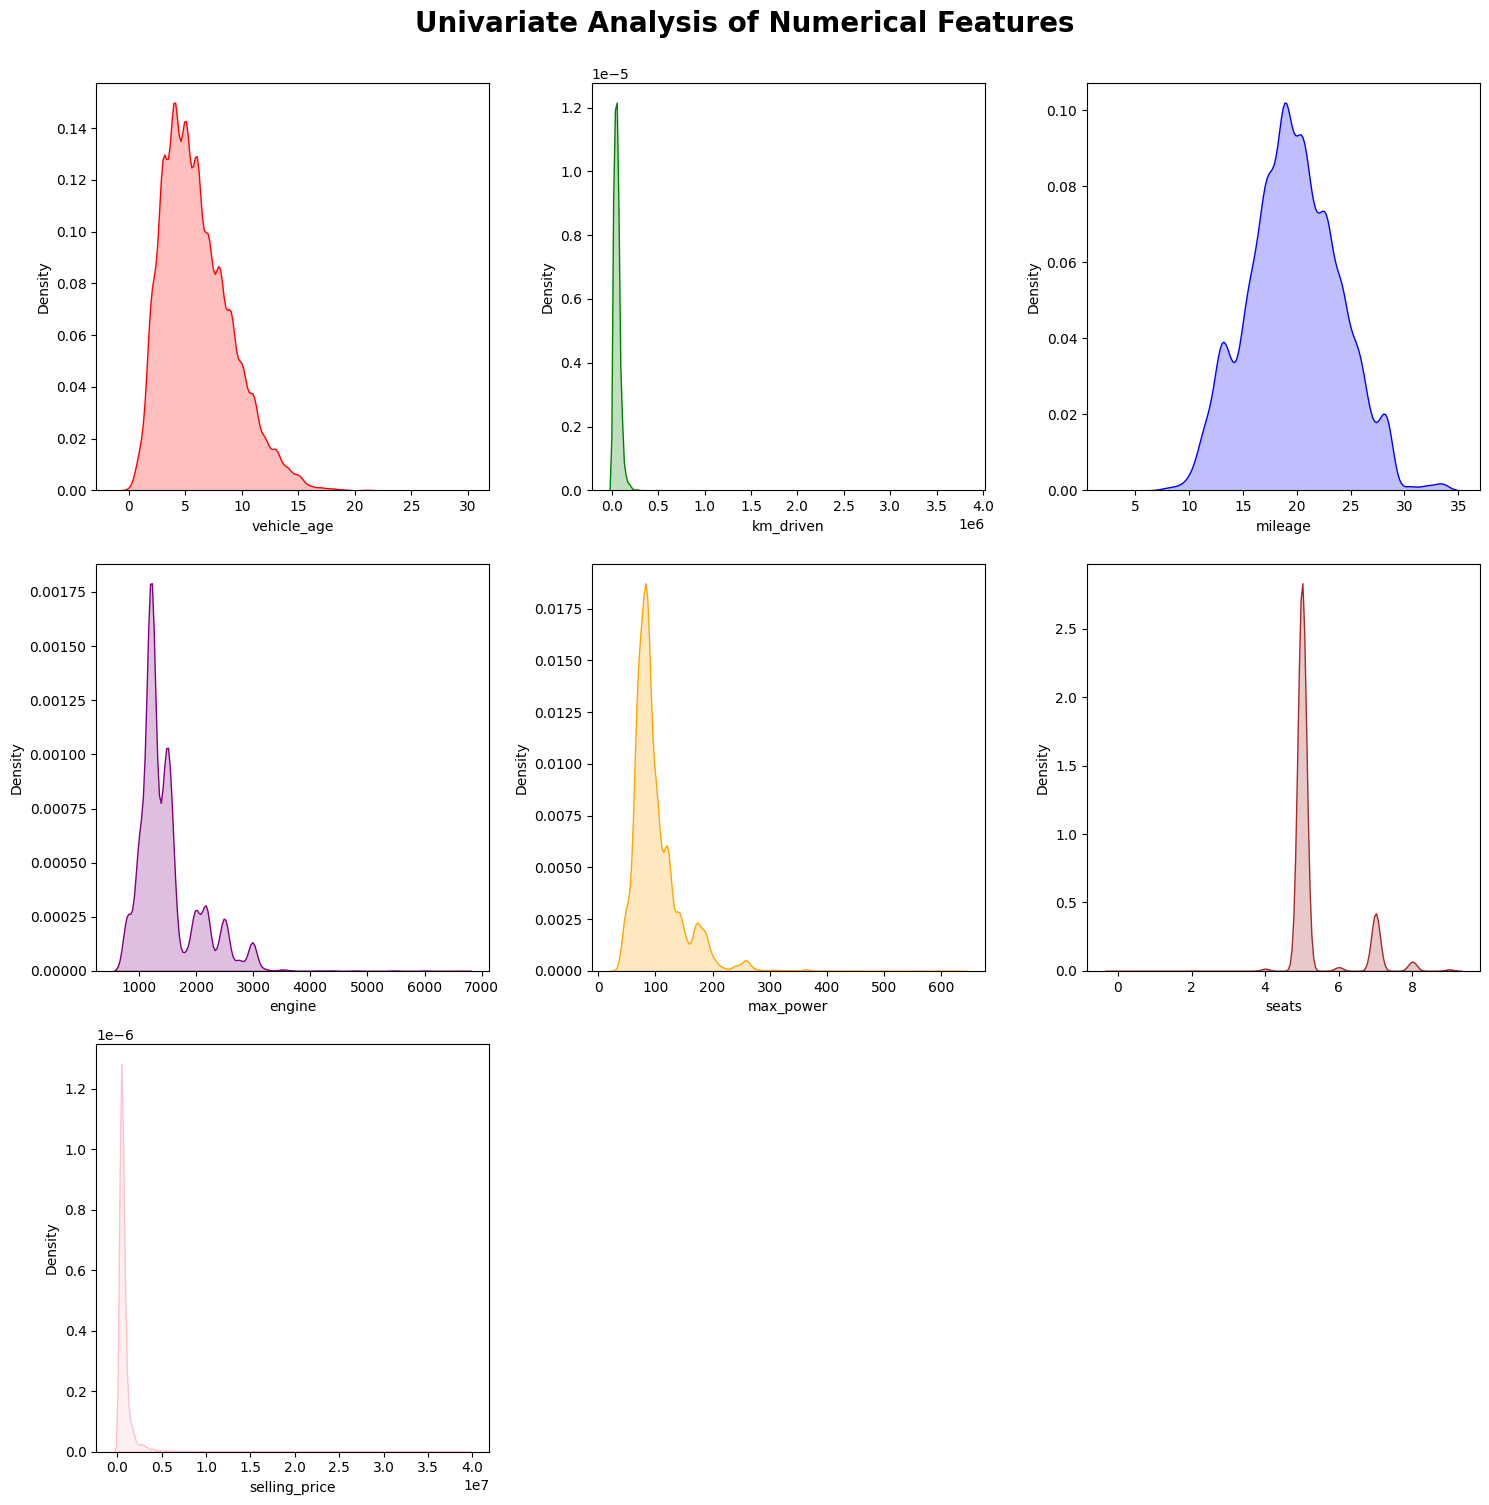

In [ ]:
# Settings for the figure
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', y=1.0)

# Colors for each plot
colors = ['red', 'green', 'blue', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive']

# Loop to create a KDE plot for each feature
for i, feature in enumerate(numeric_features):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(x=df[feature], shade=True, color=colors[i % len(colors)])
    plt.xlabel(feature)
    plt.tight_layout()

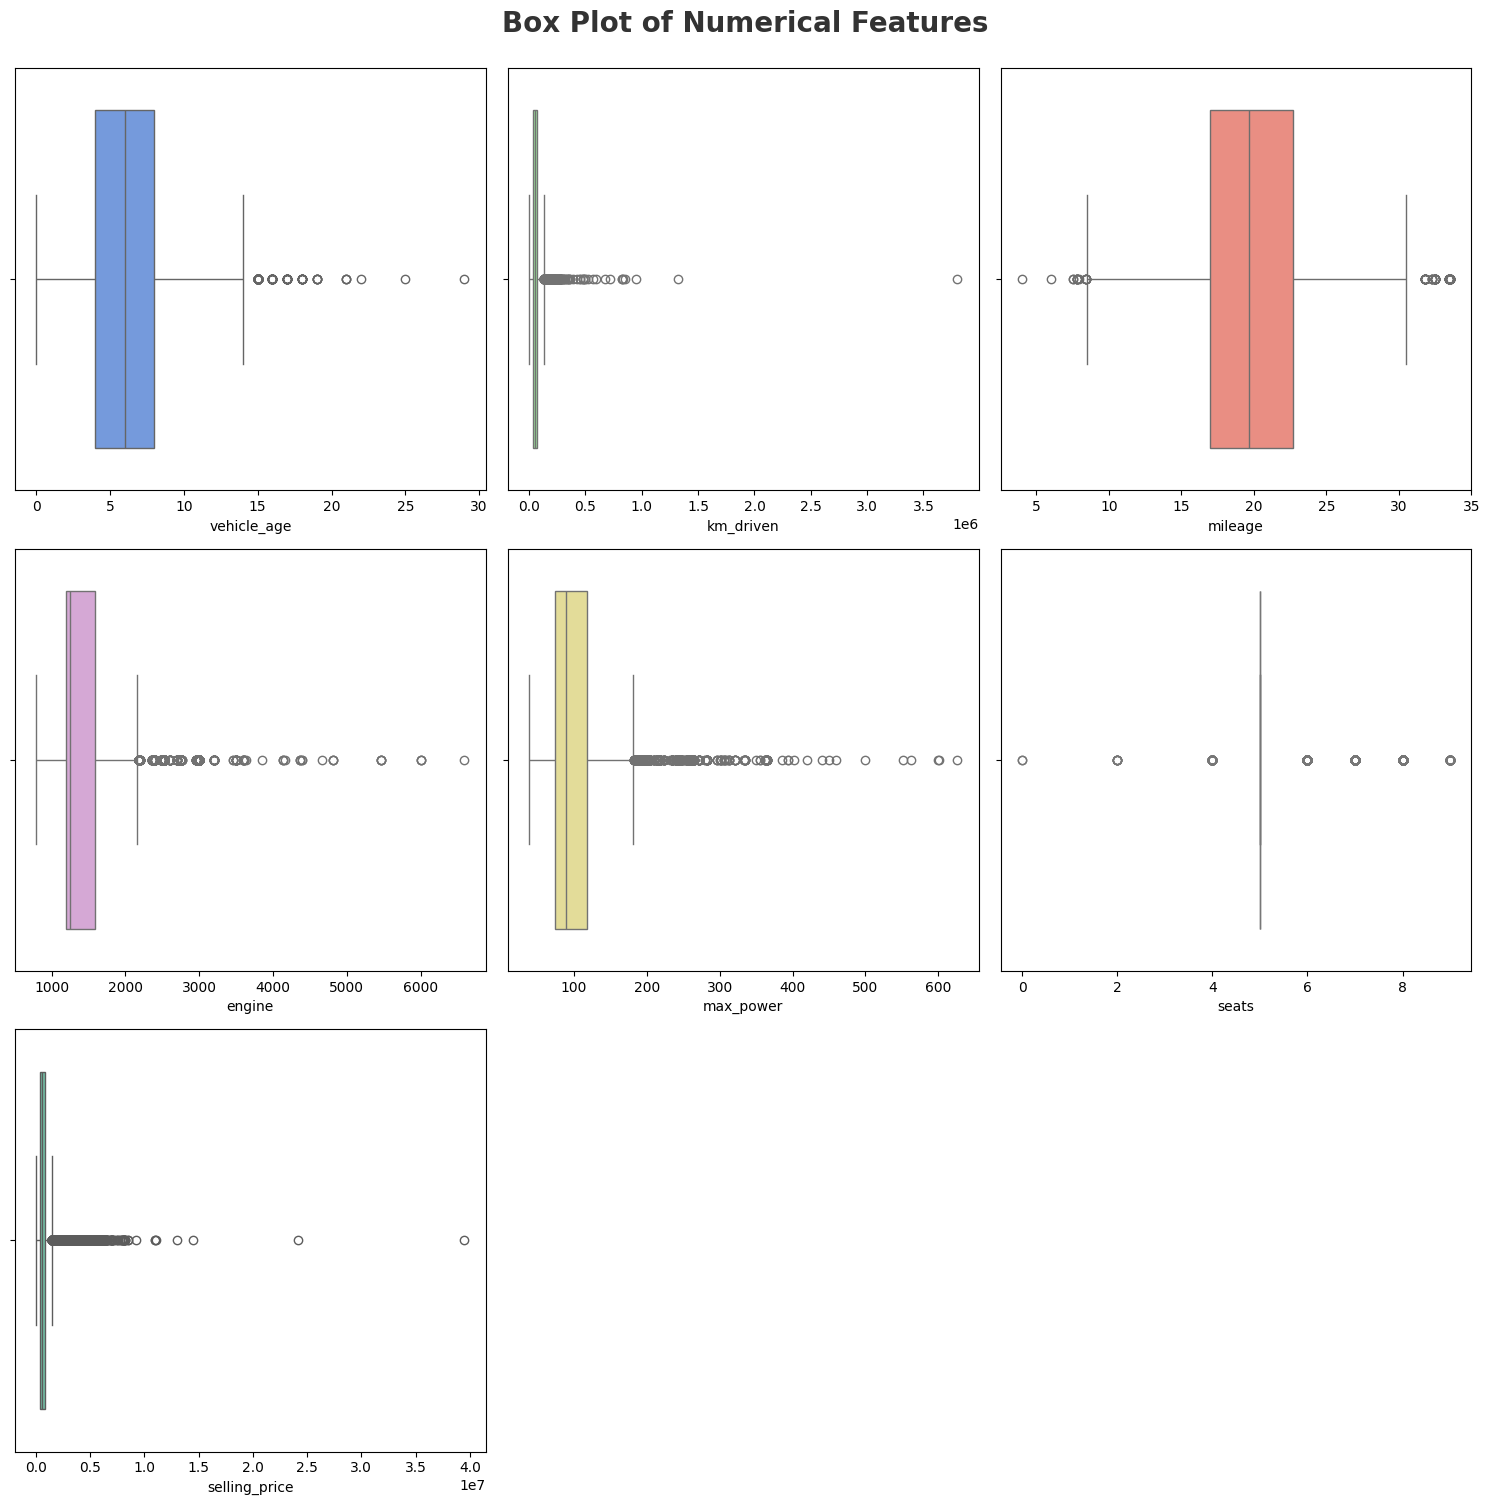

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the figure
plt.figure(figsize=(15, 15))
plt.suptitle('Box Plot of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.0)

# List of medium-light colors for the plots
medium_light_colors = ['cornflowerblue', 'lightgreen', 'salmon', 'plum', 'khaki', 'lightsteelblue', 'mediumaquamarine', 'thistle', 'lightsalmon']

for i in range(len(numeric_features)):
    plt.subplot(3, 3, i+1)
    # Apply a medium-light color from the list
    sns.boxplot(x=df[numeric_features[i]], color=medium_light_colors[i % len(medium_light_colors)])
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

#### **Report**
- Km_driven, max_power, selling_price, and engine are right skewed and postively skewed.
- Outliers in km_driven, enginer, selling_price, and max power.

## **Univariate analysis of categorical features**

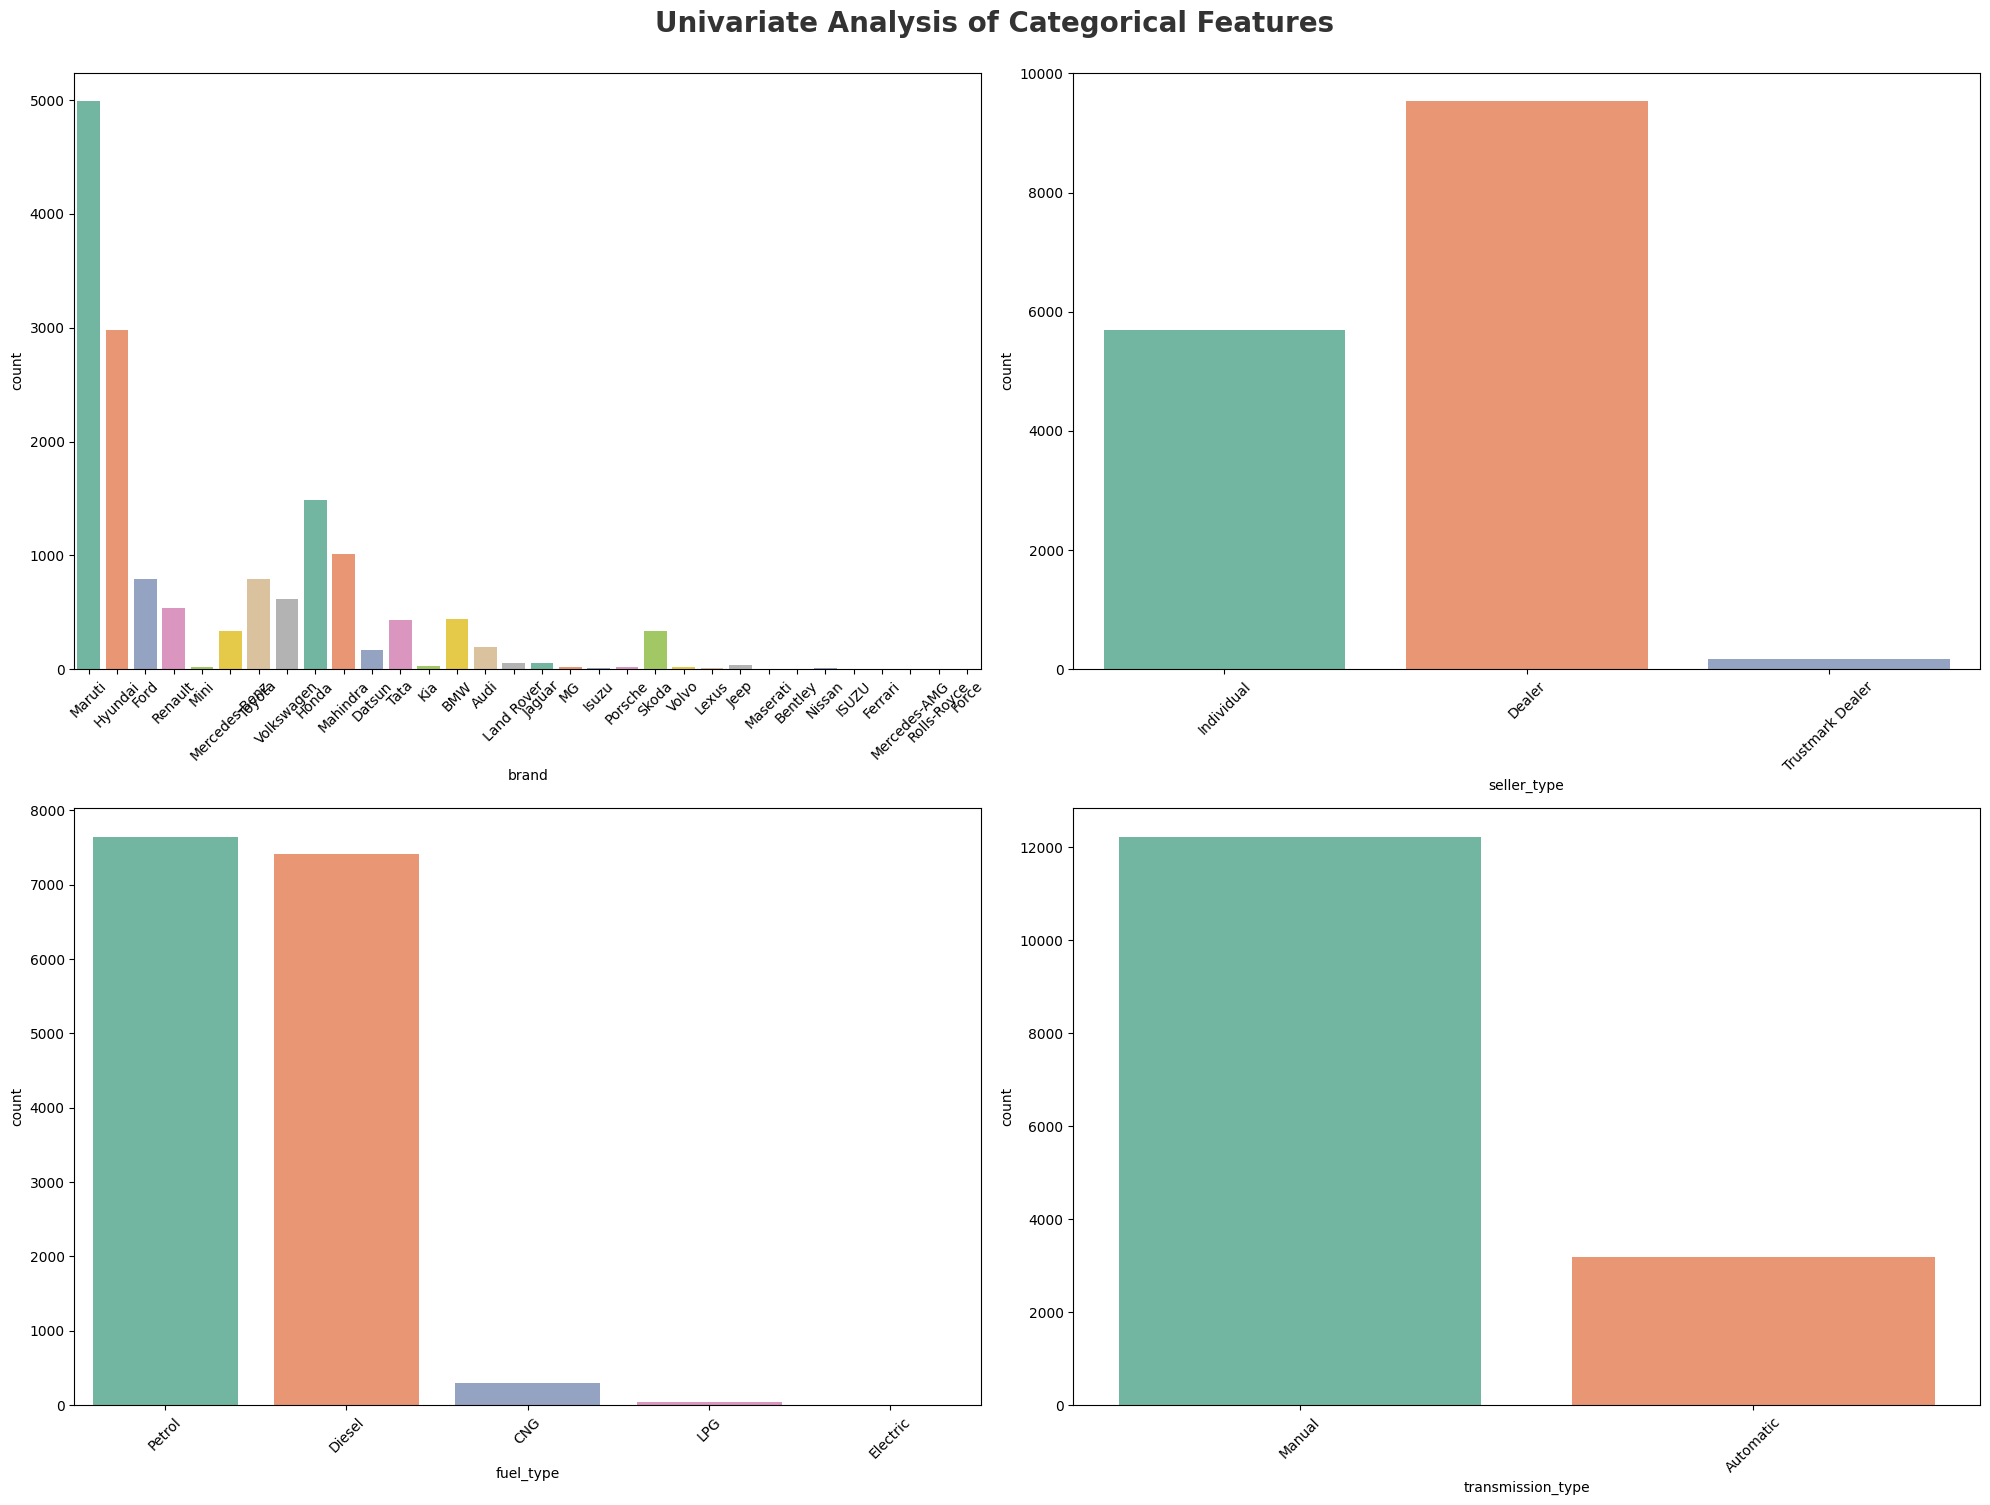

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the figure
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.0)

# List of categorical features
cat1 = ['brand', 'seller_type', 'fuel_type', 'transmission_type']

# Loop through each categorical feature and plot
for i, feature in enumerate(cat1):
    plt.subplot(2, 2, i+1)
    # Use a palette that provides a unique color for each category
    sns.countplot(x=df[feature], palette='Set2')  # 'Set2' is an example of a qualitative color palette
    plt.xlabel(feature)
    plt.xticks(rotation=45)
    plt.tight_layout()

## Univariate Analysis of Categorical Features

### Brand Distribution
- A **maruti brand** dominates the dataset, indicating its popularity or a strong market presence.
- A sharp decline in frequency for other brands highlights a significant preference gap among consumers.

### Seller Type
- There is a distinct preference for either **individual sellers** or **dealers**, with one type far outnumbering the other. This suggests differences in consumer trust, pricing, or availability.

### Fuel Type
- **Petrol** and **diesel** vehicles are overwhelmingly more common than CNG, LPG, and electric alternatives, reflecting traditional consumer preferences or market availability.

### Transmission Type
- **Manual** transmissions greatly outnumber automatic options, possibly due to cost differences, the prevalence of older vehicle models, or specific consumer driving preferences.


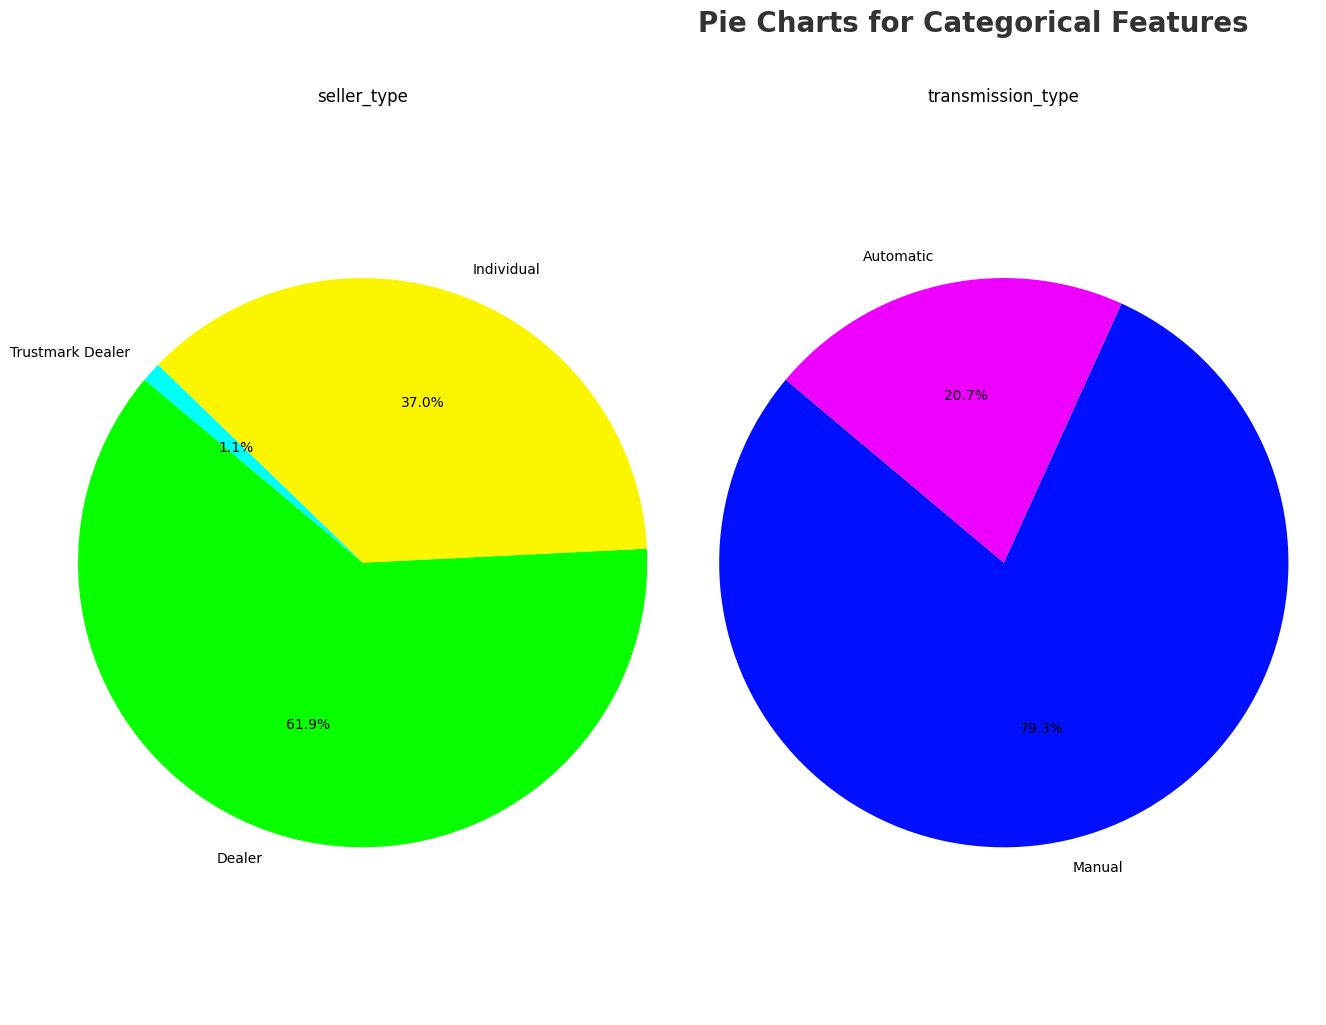

In [ ]:
import matplotlib.pyplot as plt

# Setting up the figure
plt.figure(figsize=(20, 10))  # Adjusted size based on fewer plots
plt.suptitle('Pie Charts for Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.02)  # Adjust y to prevent overlap with title

# List of categorical features, excluding 'brand'
cat1 = ['seller_type', 'transmission_type']

# Generating a large palette with unique colors
palette = sns.color_palette("hsv", n_colors=df[cat1].nunique().sum())

# Accumulating unique colors for each category in a dictionary
color_dict = {}
idx = 0
for feature in cat1:
    unique_vals = df[feature].unique()
    for val in unique_vals:
        if val not in color_dict:
            color_dict[val] = palette[idx]
            idx += 1  # Move to the next color in the palette

# Loop through each categorical feature and plot a pie chart
for i, feature in enumerate(cat1):
    plt.subplot(1, 3, i+1)  # Adjusted subplot layout for three plots
    # Getting the count of each category
    count_data = df[feature].value_counts()
    colors = [color_dict[val] for val in count_data.index]  # Color for each category
    plt.pie(count_data, labels=count_data.index, autopct='%1.1f%%', startangle=140, colors=colors)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(feature)

plt.tight_layout()
plt.show()


# **5.2 Bivariate Analysis**

In [ ]:
continuous_features=[feature for feature in numeric_features if len(df[feature].unique())>=10]
print('Num of continuos features:',continuous_features)

Num of continuos features: ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'selling_price']


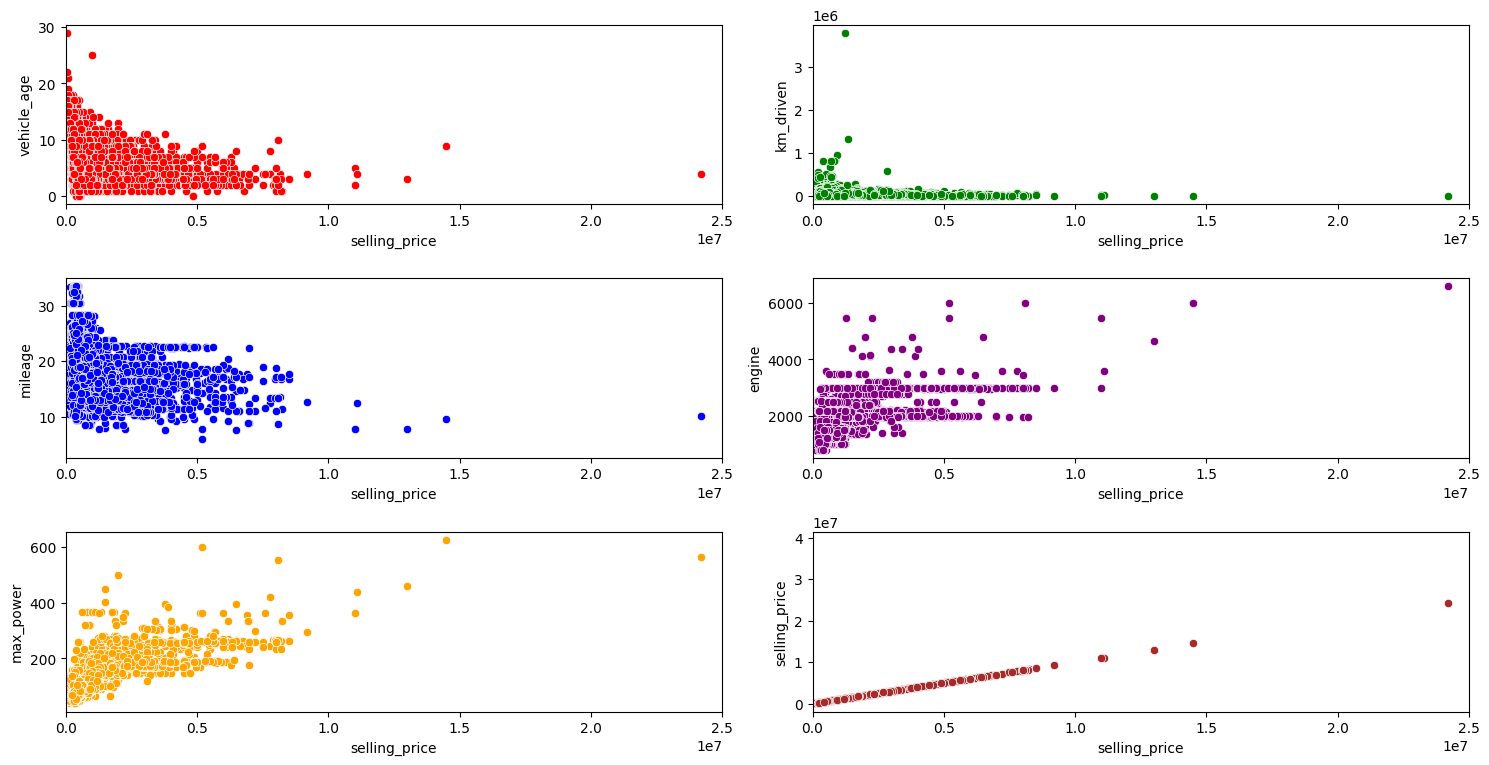

In [ ]:
# Assuming 'df' is your DataFrame and 'continuous_features' are defined
fig = plt.figure(figsize=(15, 20))

# List of colors for the plots
colors = ['red', 'green', 'blue', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow', 'black', 'lime', 'teal']

for i in range(len(continuous_features)):
    ax = plt.subplot(8, 2, i+1)

    # Apply a different color from the list for each plot
    sns.scatterplot(data=df, x='selling_price', y=continuous_features[i], color=colors[i % len(colors)])
    plt.xlim(0, 25000000)  # Limit to 25 lakhs Rupees to view clean
    plt.tight_layout()

plt.show()


#### Insights

- **Vehicle Age vs. Selling Price**:
  - *Negative correlation*: Older vehicles generally have lower selling prices.

- **Mileage vs. Selling Price**:
  - *No clear trend*: Vehicle prices do not significantly vary with changes in mileage.

- **Kilometers Driven vs. Selling Price**:
  - *No strong impact*: Less-used vehicles show no consistent pricing pattern.

- **Engine Size vs. Selling Price**:
  - *Moderate positive correlation*: Larger engine sizes often correlate with higher selling prices.

- **Max Power vs. Selling Price**:
  - *Positive correlation*: Higher maximum power typically leads to higher selling prices.



# **5.3 Multivariate Analysis**

## **Check Multicollinearity in Numerical features**

In [ ]:
df[numeric_features].corr()

vehicle_age  km_driven   mileage    engine  max_power  \
vehicle_age       1.000000   0.333891 -0.257394  0.098965   0.005208   
km_driven         0.333891   1.000000 -0.105239  0.192885   0.044421   
mileage          -0.257394  -0.105239  1.000000 -0.632987  -0.533128   
engine            0.098965   0.192885 -0.632987  1.000000   0.807368   
max_power         0.005208   0.044421 -0.533128  0.807368   1.000000   
seats             0.030791   0.192830 -0.440280  0.551236   0.172257   
selling_price    -0.241851  -0.080030 -0.305549  0.585844   0.750236   

                  seats  selling_price  
vehicle_age    0.030791      -0.241851  
km_driven      0.192830      -0.080030  
mileage       -0.440280      -0.305549  
engine         0.551236       0.585844  
max_power      0.172257       0.750236  
seats          1.000000       0.115033  
selling_price  0.115033       1.000000

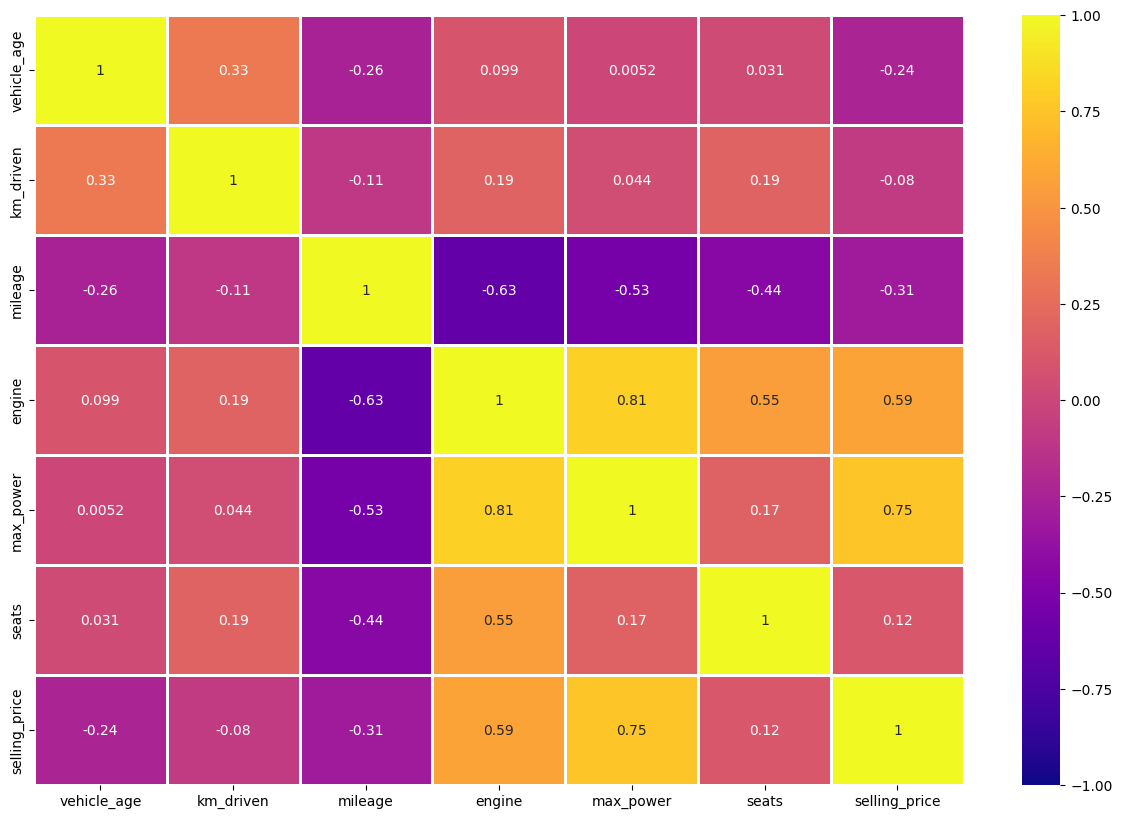

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(data = df[numeric_features].corr(), annot= True, cmap= 'plasma', vmin= -1 , vmax= 1, linecolor='white', linewidths=2)
plt.show()

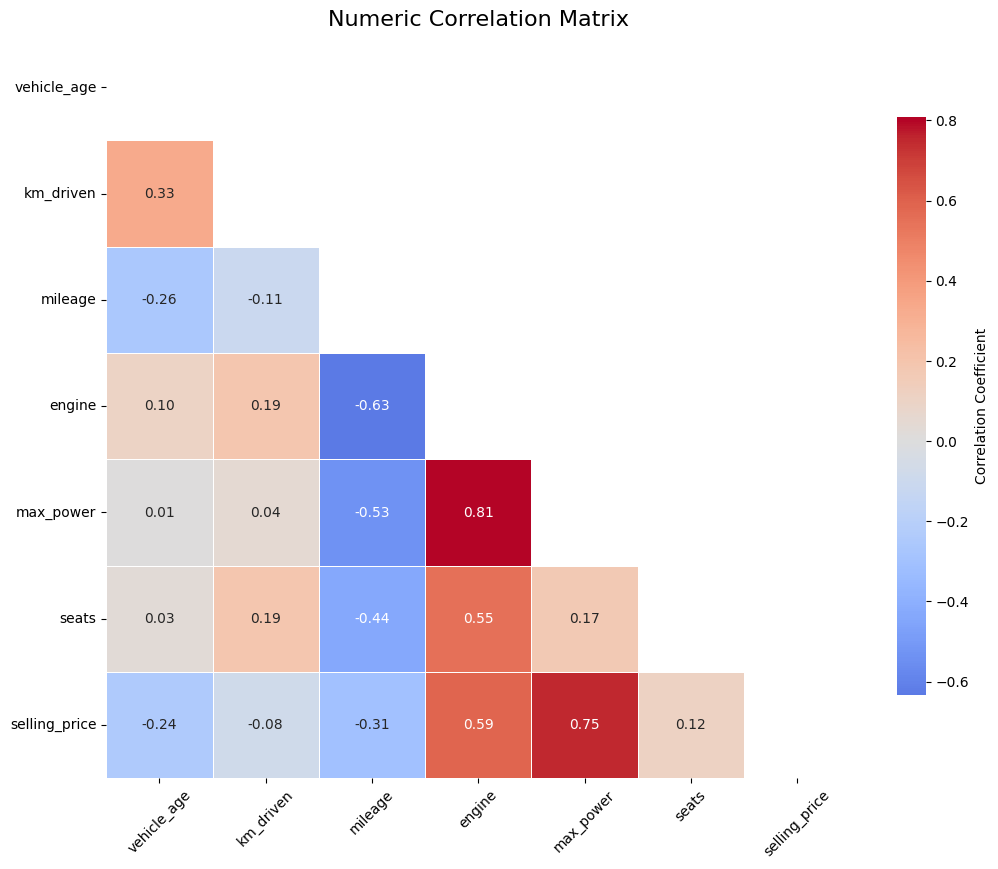

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and has been loaded in the current session
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix for numeric columns
corr = numeric_df.corr()

# Setting up the matplotlib figure
plt.figure(figsize=(12, 10))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Drawing the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
            center=0, square=True, linewidths=.5, cbar_kws={"shrink": .75, "label": "Correlation Coefficient"})

# Enhance visibility
plt.title('Numeric Correlation Matrix', fontsize=16)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.show()


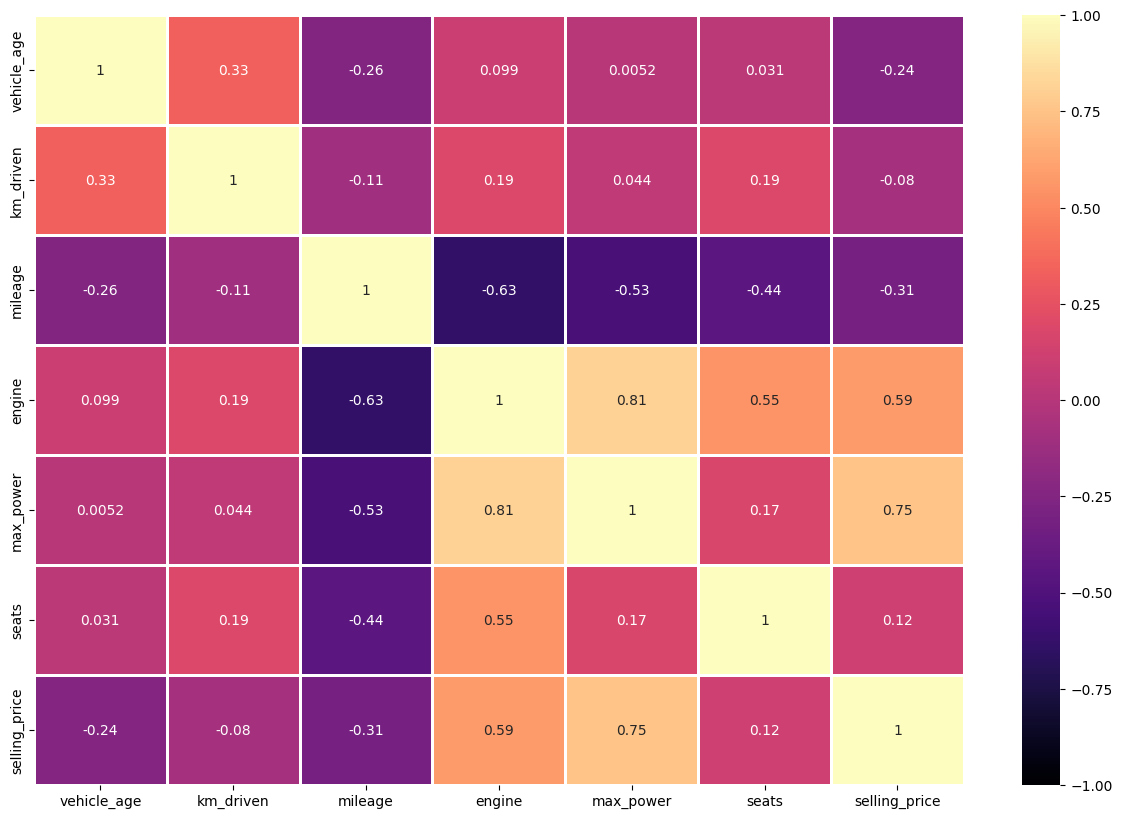

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.heatmap(data=df[numeric_features].corr(), annot=True, cmap='magma', vmin=-1, vmax=1, linecolor='white', linewidths=2)
plt.show()


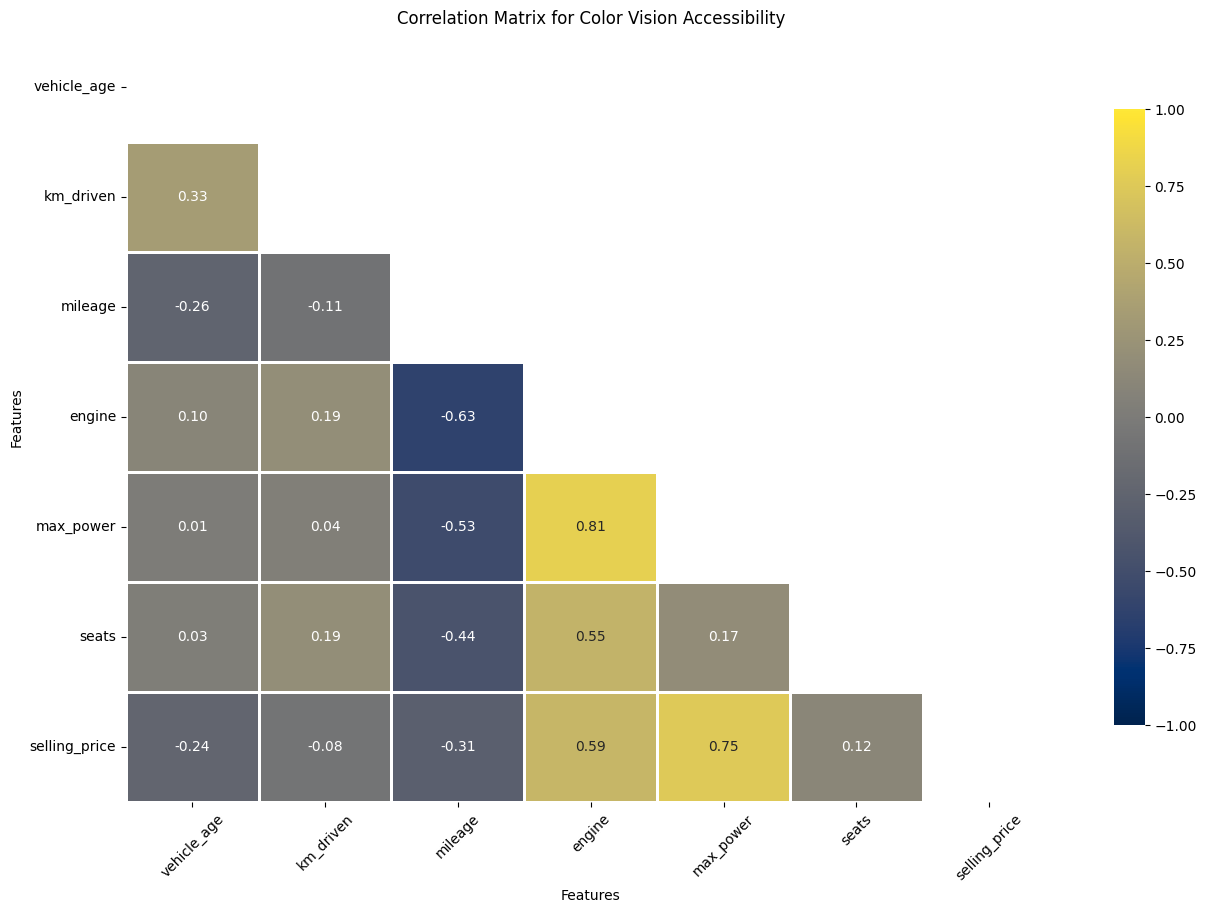

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(15, 10))
# Calculate the correlation matrix
corr = df[numeric_features].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='cividis',
            vmin=-1, vmax=1, linecolor='white', linewidths=1, cbar_kws={"shrink": .8})

plt.title('Correlation Matrix for Color Vision Accessibility')
plt.xticks(rotation=45)  # Rotate feature names for better visibility
plt.yticks(rotation=0)  # Keep y-axis labels horizontal for better readability
plt.xlabel('Features')  # Label for the x-axis
plt.ylabel('Features')  # Label for the y-axis
plt.show()


#### **Insights**
- 1. Max Power and Engine are highly correlated
- 2. Max Power and Selling Price are highly correlated.

# **Check Multicollinearity for Categorical features**

* **A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test**

* **A chi-square statistic is one way to show a relationship between two categorical variables.**

* **Here we test correlation of Categorical columns with Target column i.e Selling Price**

In [ ]:
from scipy.stats import chi2_contingency
chi2_test = []

for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['selling_price'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
test_result = pd.DataFrame(data=[categorical_features, chi2_test]).T
test_result.columns = ['Categorical Features', 'Hypothesis Result']

print('-'*100)
print('Chi-Squarred Test (Checking Multi-collinearity for  Categorical features) results are as follows :')
print('-'*100)

test_result

----------------------------------------------------------------------------------------------------
Chi-Squarred Test (Checking Multi-collinearity for  Categorical features) results are as follows :
----------------------------------------------------------------------------------------------------


Categorical Features       Hypothesis Result
0             car_name  Reject Null Hypothesis
1                brand  Reject Null Hypothesis
2                model  Reject Null Hypothesis
3          seller_type  Reject Null Hypothesis
4            fuel_type  Reject Null Hypothesis
5    transmission_type  Reject Null Hypothesis

# **7) Data Cleaning & Preprocessing II**

Not required as of now. Preprocessing will be taken care during feature engineering

# **8) Insights from Data Visualization**

## **Selling Price Distribution (Target Feature Distribution)**

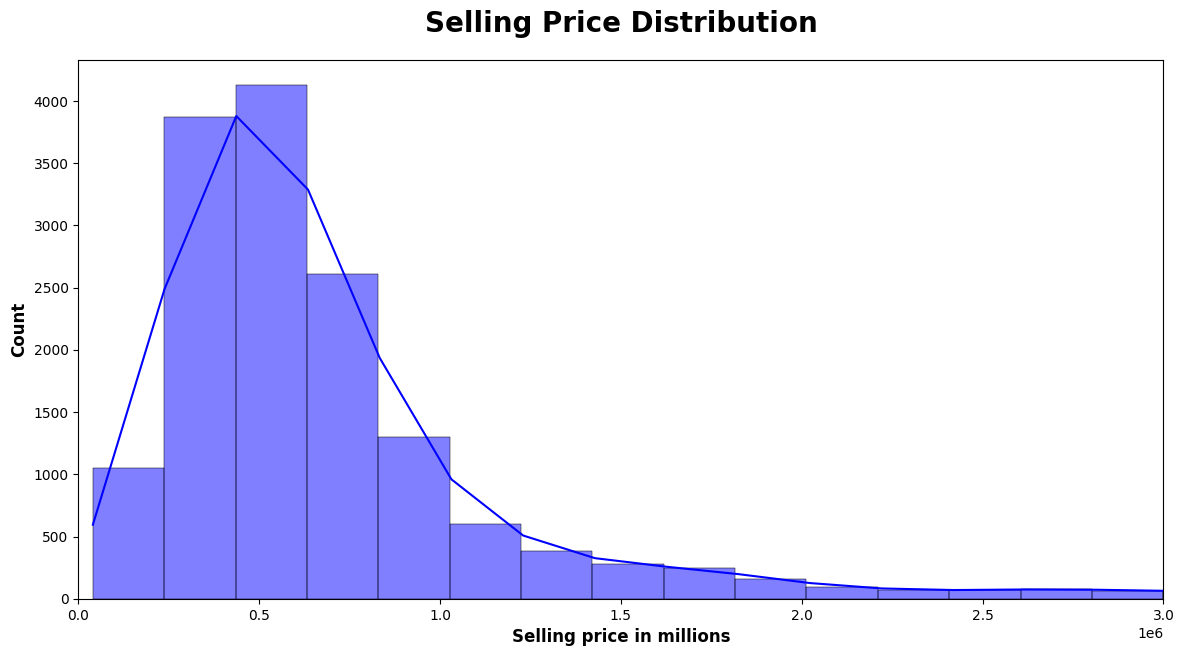

In [ ]:
plt.subplots(figsize=(14,7))
sns.histplot(df.selling_price, bins=200, kde=True, color = 'b')
plt.title("Selling Price Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Selling price in millions", weight="bold", fontsize=12)
plt.xlim(0,3000000)
plt.show()

- From the chart it is clear that the Target Variable Skewed

## **Most Sold Cars on CarDekho Website**

In [ ]:
print('-'*50)
print('Top 10 Sold Cars on CarDekho Website')
print('-'*50)

df.car_name.value_counts()[0:10]

--------------------------------------------------
Top 10 Sold Cars on CarDekho Website
--------------------------------------------------


car_name
Hyundai i20           906
Maruti Swift Dzire    890
Maruti Swift          781
Maruti Alto           778
Honda City            757
Maruti Wagon R        717
Hyundai Grand         580
Toyota Innova         545
Hyundai Verna         492
Hyundai i10           410
Name: count, dtype: int64

- Most Selling Used Car is Hyundai i20

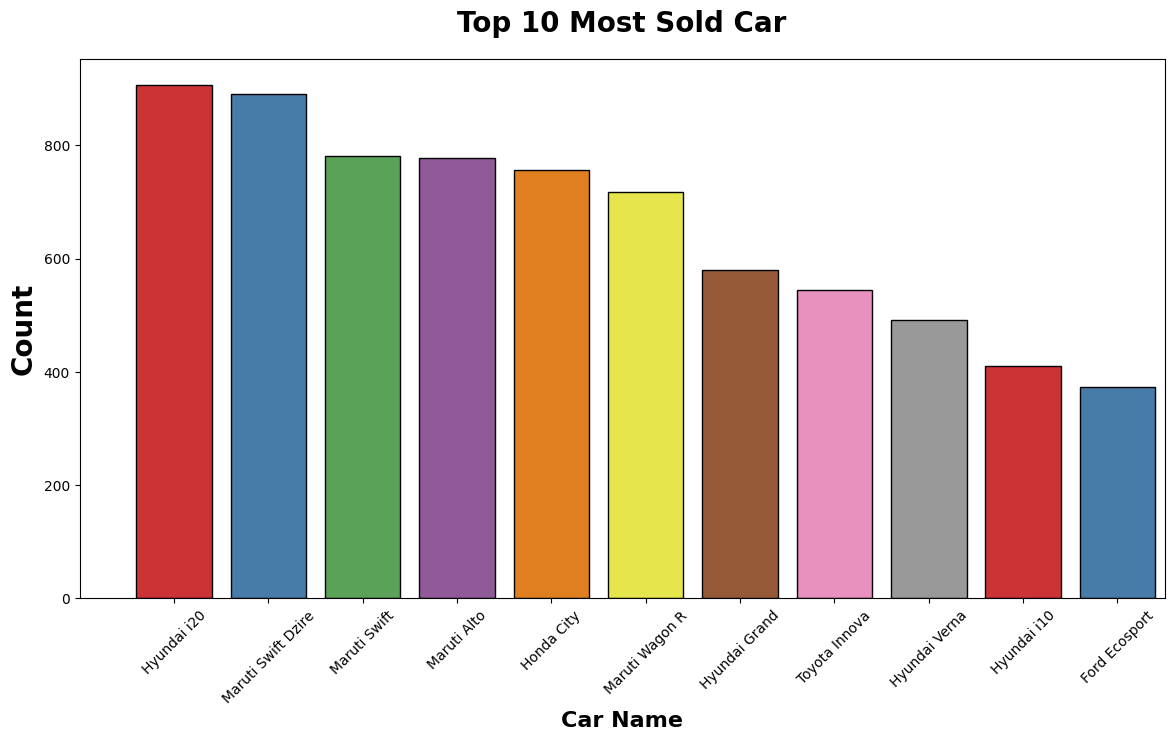

In [ ]:
plt.subplots(figsize=(14,7))
sns.countplot(x="car_name", data=df,ec = "black",palette="Set1",order = df['car_name'].value_counts().index)
plt.title("Top 10 Most Sold Car", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Car Name", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

- Check mean price of Hyundai i20 which is most sold

In [ ]:
i20 = df[df['car_name'] == 'Hyundai i20']['selling_price'].mean()
print(f'The mean price of Hyundai i20 is {i20:.2f} Rupees')

The mean price of Hyundai i20 is 543603.75 Rupees


#### **Insights**
* As per the Chart these are top 10 most selling cars in used car website.
* Of the total cars sold Hyundai i20 shares 5.8% of total ads posted and followed by Maruti Swift Dzire.
* Mean Price of Most Sold Car is 5.4 lakhs.
* This Feature has impact on the Target Variable.

## **Most Sold Car Brand on CarDekho Website**

In [ ]:
print('-'*50)
print('Top 10 Most Sold Car Brand')
print('-'*50)

df.brand.value_counts()[0:10]

--------------------------------------------------
Top 10 Most Sold Car Brand
--------------------------------------------------


brand
Maruti        4992
Hyundai       2982
Honda         1485
Mahindra      1011
Toyota         793
Ford           790
Volkswagen     620
Renault        536
BMW            439
Tata           430
Name: count, dtype: int64

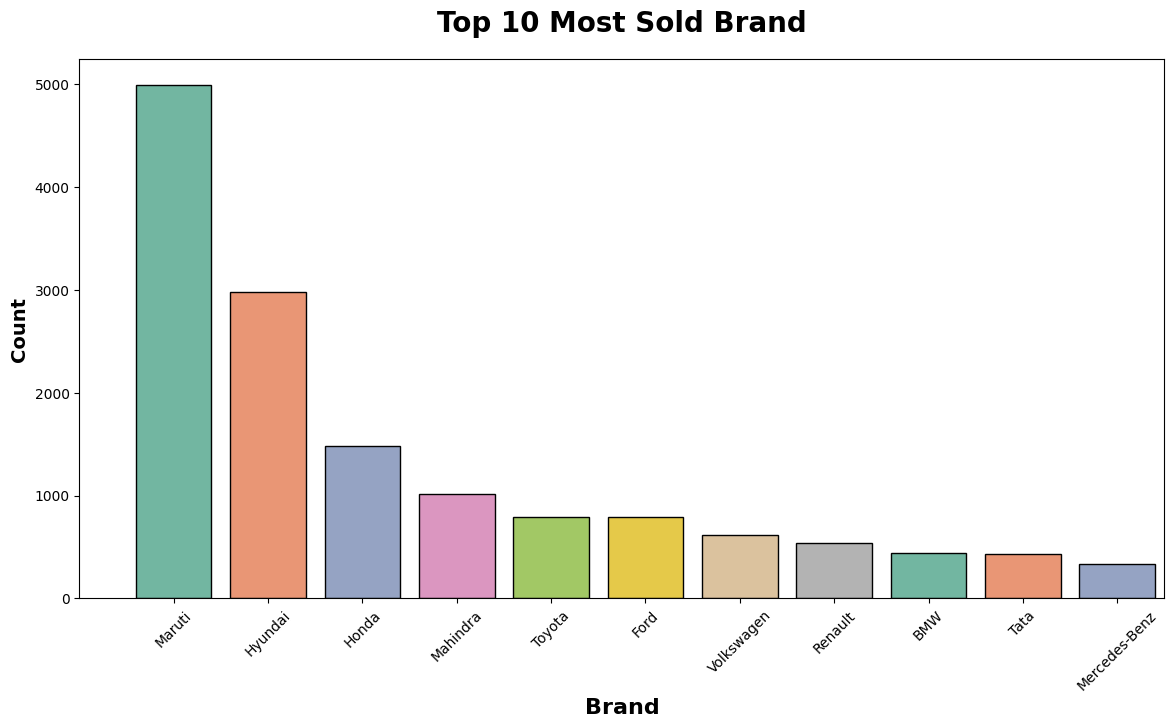

In [ ]:
plt.subplots(figsize=(14,7))
sns.countplot(x="brand", data=df,ec = "black",palette="Set2",order = df['brand'].value_counts().index)
plt.title("Top 10 Most Sold Brand", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=14)
plt.xlabel("Brand", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

- Check the Mean price of Maruti brand which is most sold

In [ ]:
maruti = df[df['brand'] == 'Maruti']['selling_price'].mean()
print(f'The mean price of Maruti is {maruti:.2f} Rupees')

The mean price of Maruti is 487089.32 Rupees


#### **Insights**
* As per the Chart Maruti has the most share of Ads in Used car website and Maruti is the most sold brand.
* Following Maruti we have Hyundai and Honda.
* Mean Price of Maruti Brand is 4.8 lakhs.

## **Costlier Brand on CarDekho Website**

In [ ]:
brand = df.groupby('brand').selling_price.max()
brand = brand.to_frame().sort_values('selling_price',ascending=False)[0:10]

print('-'*50)
print('Top 10 Costlier Brands on CarDekho Website')
print('-'*50)

brand

--------------------------------------------------
Top 10 Costlier Brands on CarDekho Website
--------------------------------------------------


selling_price
brand                       
Ferrari             39500000
Rolls-Royce         24200000
Bentley             14500000
Mercedes-Benz       13000000
Porsche             11100000
Land Rover           9200000
BMW                  8500000
Volvo                8195000
Lexus                8000000
Audi                 6800000

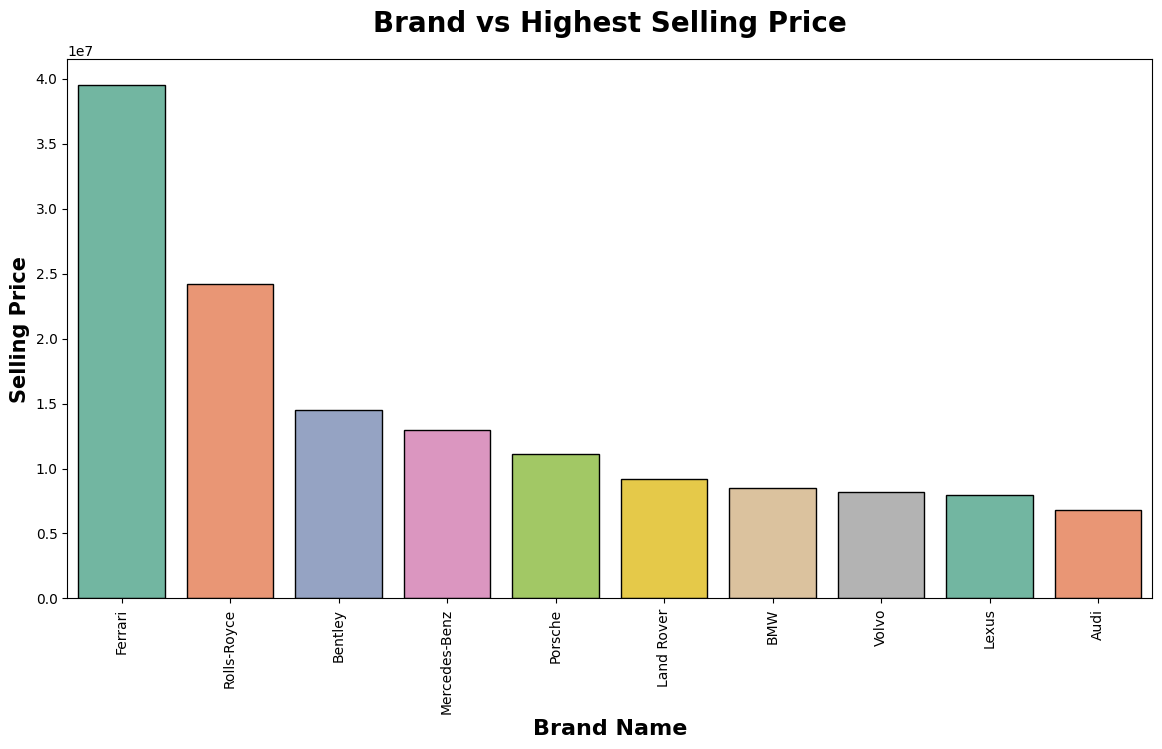

In [ ]:
plt.subplots(figsize=(14,7))
sns.barplot(x=brand.index, y=brand.selling_price,ec = "black",palette="Set2")
plt.title("Brand vs Highest Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=15)
plt.xlabel("Brand Name", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()

#### **Insights**
* Costliest Brand sold is Ferrari at 3.95 Crores.
* Second most costliest car Brand is Rolls-Royce as 2.42 Crores.
* Brand name has very clear impact on selling price.

## **Costlier Car on CarDekho Website**

In [ ]:
car= df.groupby('car_name').selling_price.max()
car =car.to_frame().sort_values('selling_price',ascending=False)[0:10]

print('-'*50)
print('Top 10 Costlier Cars on CarDekho Website')
print('-'*50)

car

--------------------------------------------------
Top 10 Costlier Cars on CarDekho Website
--------------------------------------------------


selling_price
car_name                            
Ferrari GTC4Lusso           39500000
Rolls-Royce Ghost           24200000
Bentley Continental         14500000
Mercedes-Benz S-Class       13000000
Porsche Cayenne             11100000
Land Rover Rover             9200000
BMW 7                        8500000
BMW Z4                       8250000
Volvo XC                     8195000
BMW X5                       8100000

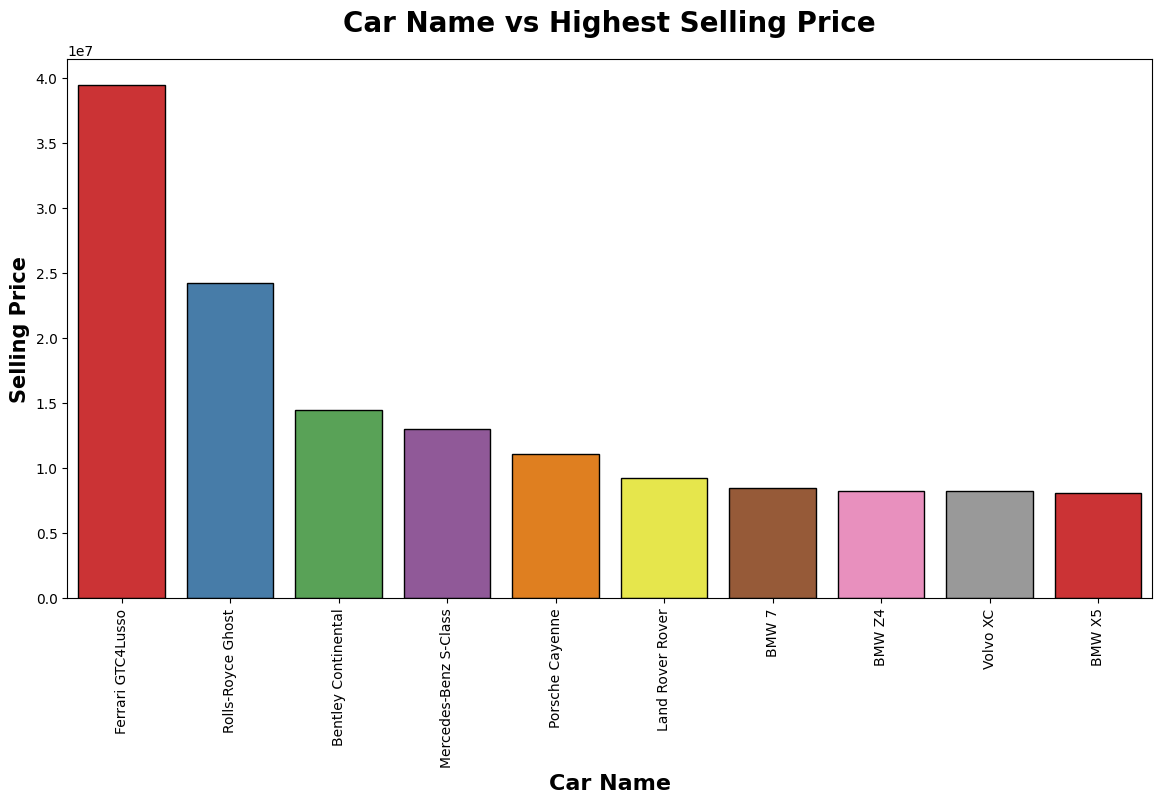

In [ ]:
plt.subplots(figsize=(14,7))
sns.barplot(x=car.index, y=car.selling_price,ec = "black",palette="Set1")
plt.title("Car Name vs Highest Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=15)
plt.xlabel("Car Name", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()

#### **Insights**
* Costliest Car sold is Ferrari GTC4 Lusso followed by Rolls Royce Ghost.
* Ferrari selling price is 3.95 Crs.
* Other than Ferrari other car has priced below 1.5cr.

## **Most Mileage Car Brand on CarDekho Website**

In [ ]:
mileage= df.groupby('brand')['mileage'].mean().sort_values(ascending=False).head(15)

print('-'*50)
print('Most Mileage Car Brand on CarDekho Website')
print('-'*50)

mileage.to_frame()

--------------------------------------------------
Most Mileage Car Brand on CarDekho Website
--------------------------------------------------


mileage
brand                
Maruti      22.430980
Renault     22.099142
Datsun      21.215647
Lexus       20.846000
Ford        19.922620
Honda       19.908795
Maserati    19.820000
Tata        19.755279
Hyundai     19.588776
Volkswagen  18.689774
Mini        18.287647
Skoda       17.667006
BMW         17.440182
Kia         17.323125
Force       17.000000

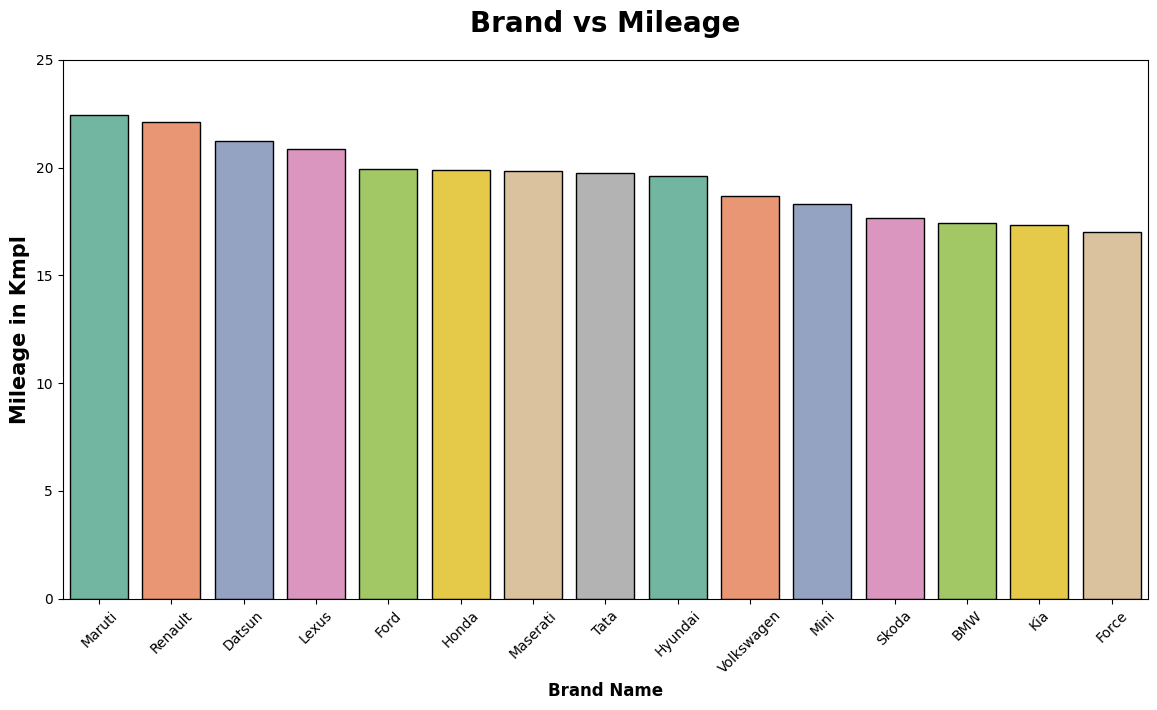

In [ ]:
plt.subplots(figsize=(14,7))
sns.barplot(x=mileage.index, y=mileage.values, ec = "black", palette="Set2")
plt.title("Brand vs Mileage", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mileage in Kmpl", weight="bold", fontsize=15)
plt.xlabel("Brand Name", weight="bold", fontsize=12)
plt.ylim(0,25)
plt.xticks(rotation=45)
plt.show()

## **Most Mileage Car on CarDekho Website**

In [ ]:
mileage_Car= df.groupby('car_name')['mileage'].mean().sort_values(ascending=False).head(10)

print('-'*50)
print('Most Mileage Car on CarDekho Website')
print('-'*50)

mileage_Car.to_frame()

--------------------------------------------------
Most Mileage Car on CarDekho Website
--------------------------------------------------


mileage
car_name                   
Tata Tiago        24.625103
Maruti Ciaz       24.289046
Maruti Vitara     24.231932
Renault KWID      24.037810
Maruti Celerio    23.703502
Maruti Dzire VXI  23.512941
Maruti Dzire LXI  23.260000
Maruti Dzire ZXI  23.260000
Ford Aspire       22.993846
Maruti Swift      22.719910

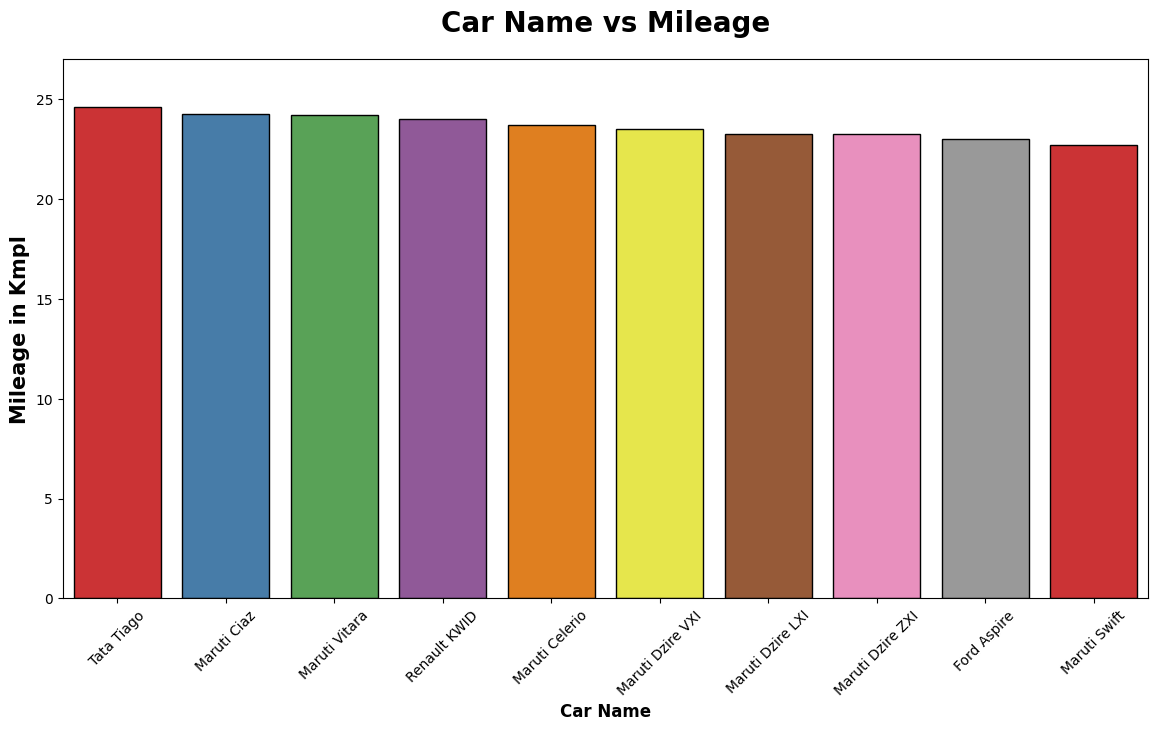

In [ ]:
plt.subplots(figsize=(14,7))
sns.barplot(x=mileage_Car.index, y=mileage_Car.values, ec = "black", palette="Set1")
plt.title("Car Name vs Mileage", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mileage in Kmpl", weight="bold", fontsize=15)
plt.xlabel("Car Name", weight="bold", fontsize=12)
plt.ylim(0,27)
plt.xticks(rotation=45)
plt.show()

## **Kilometers Driven Vs Selling Price**

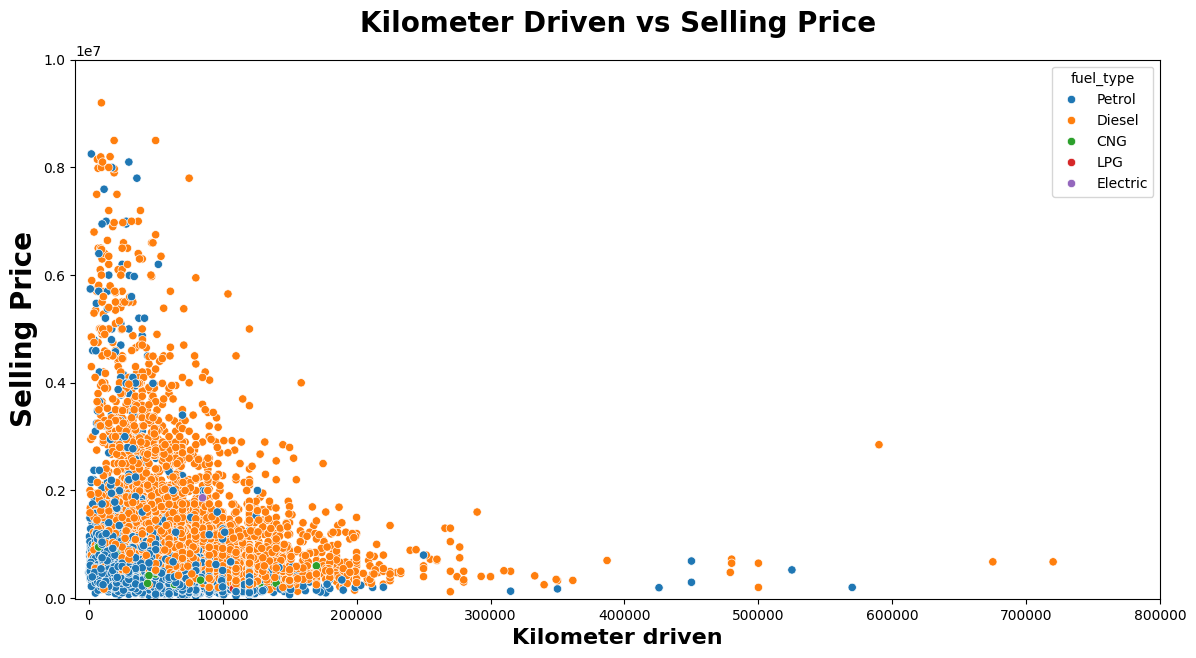

In [ ]:
plt.subplots(figsize=(14,7))
sns.scatterplot(x="km_driven", y='selling_price', data=df,ec = "white",color='b', hue='fuel_type')
plt.title("Kilometer Driven vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=20)
plt.xlim(-10000,800000) #used limit for better visualization
plt.ylim(-10000,10000000)
plt.xlabel("Kilometer driven", weight="bold", fontsize=16)
plt.show()



### **Insights**
- Many Cars were sold with kms between 0 to 20k Kilometers
- Low Kms driven cars had more selling price compared to cars which had more kms driven.

## **Fuel Type Vs Selling Price**

In [ ]:
fuel = df.groupby('fuel_type')['selling_price'].median().sort_values(ascending=False)
fuel.to_frame()

selling_price
fuel_type               
Electric       1857500.0
Diesel          700000.0
Petrol          460000.0
CNG             370000.0
LPG             182500.0

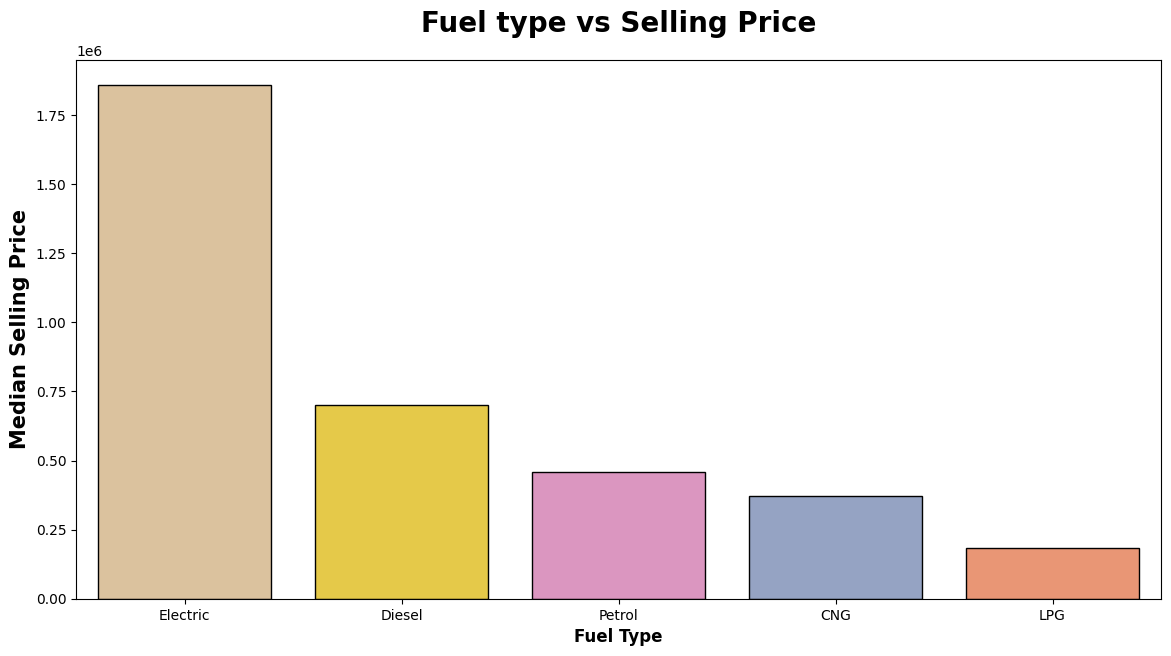

In [ ]:
plt.subplots(figsize=(14,7))
sns.barplot(x=fuel.index, y=fuel.values, ec = "black", palette="Set2_r")
plt.title("Fuel type vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Median Selling Price", weight="bold", fontsize=15)
plt.xlabel("Fuel Type", weight="bold", fontsize=12)
plt.show()

#### **Insights**
- Electric cars have highers selling average price.
- Followed by Diesel and Petrol.
- Fuel Type is also important feature for the Target variable.

## **Most Sold Fuel type**

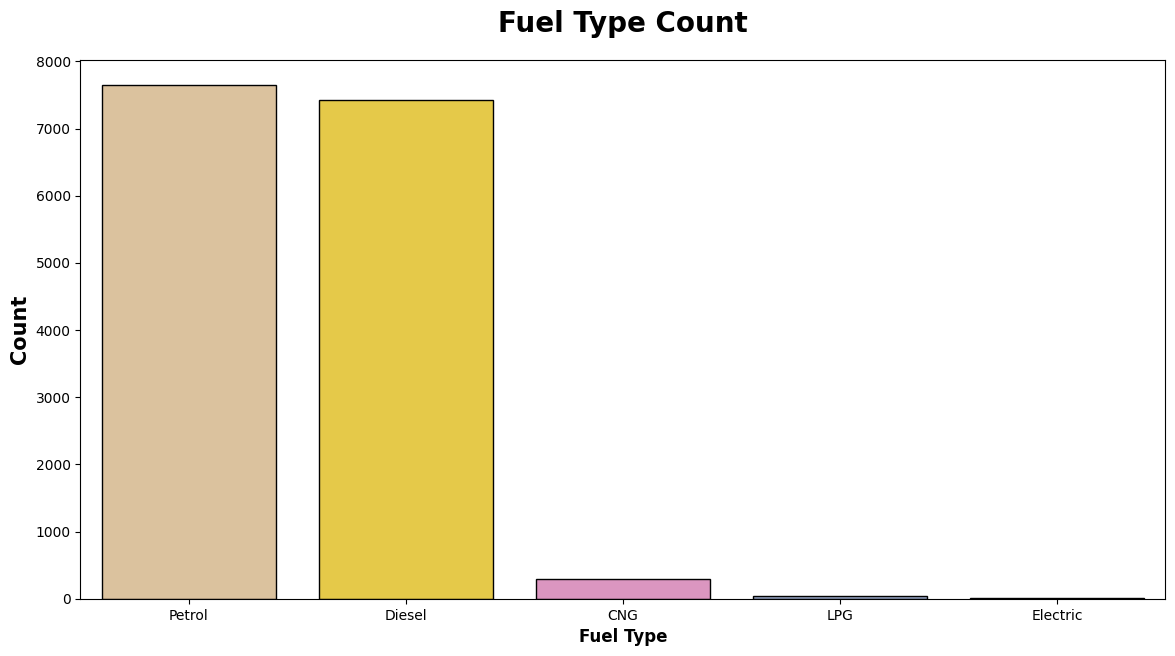

In [ ]:
plt.subplots(figsize=(14,7))
sns.countplot(x=df.fuel_type, ec = "black", palette="Set2_r")
plt.title("Fuel Type Count", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Fuel Type", weight="bold", fontsize=12)
plt.show()

#### **Insights**
- Petrol and Diesel dominate the used car market in the website.
- The most sold fuel type Vechicle is Petrol.
- Followed by diesel and CNG and least sold is Electric

## **Fuel Type Vs Mileage**

In [ ]:
fuel_mileage = df.groupby('fuel_type')['mileage'].mean().sort_values(ascending=False)
fuel_mileage.to_frame()

mileage
fuel_type           
CNG        25.814651
Diesel     20.060030
Electric   19.160000
Petrol     19.123045
LPG        17.836364

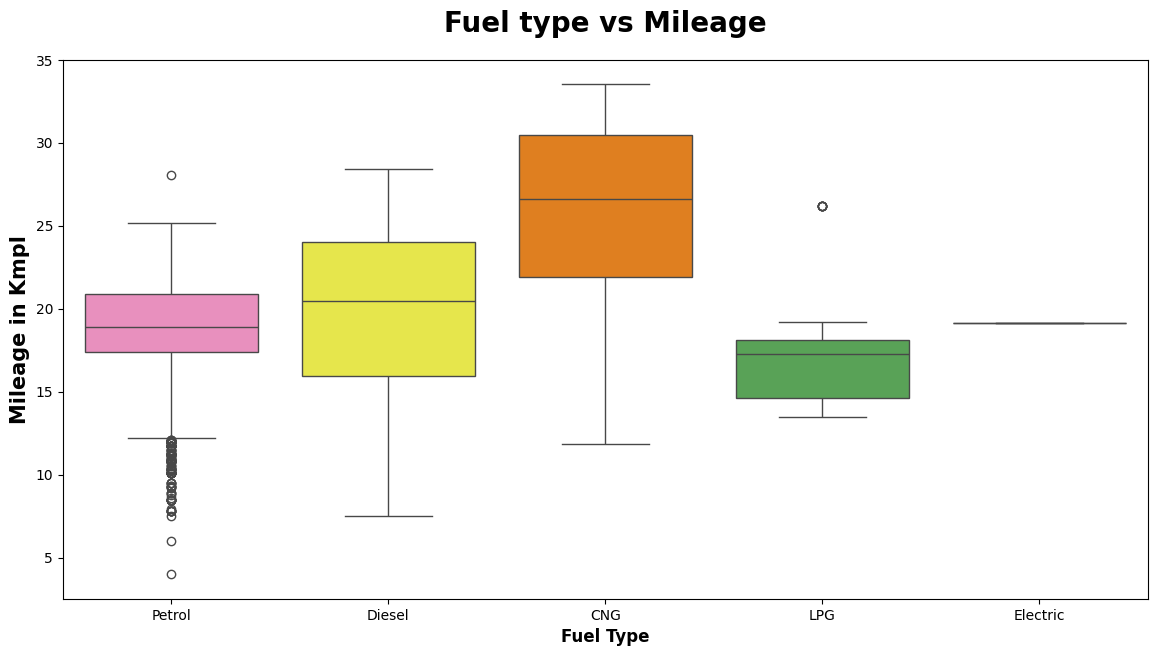

In [ ]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type', y='mileage', data=df,palette="Set1_r")
plt.title("Fuel type vs Mileage", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mileage in Kmpl", weight="bold", fontsize=15)
plt.xlabel("Fuel Type", weight="bold", fontsize=12)
plt.show()

## **Mileage vs Selling Price**

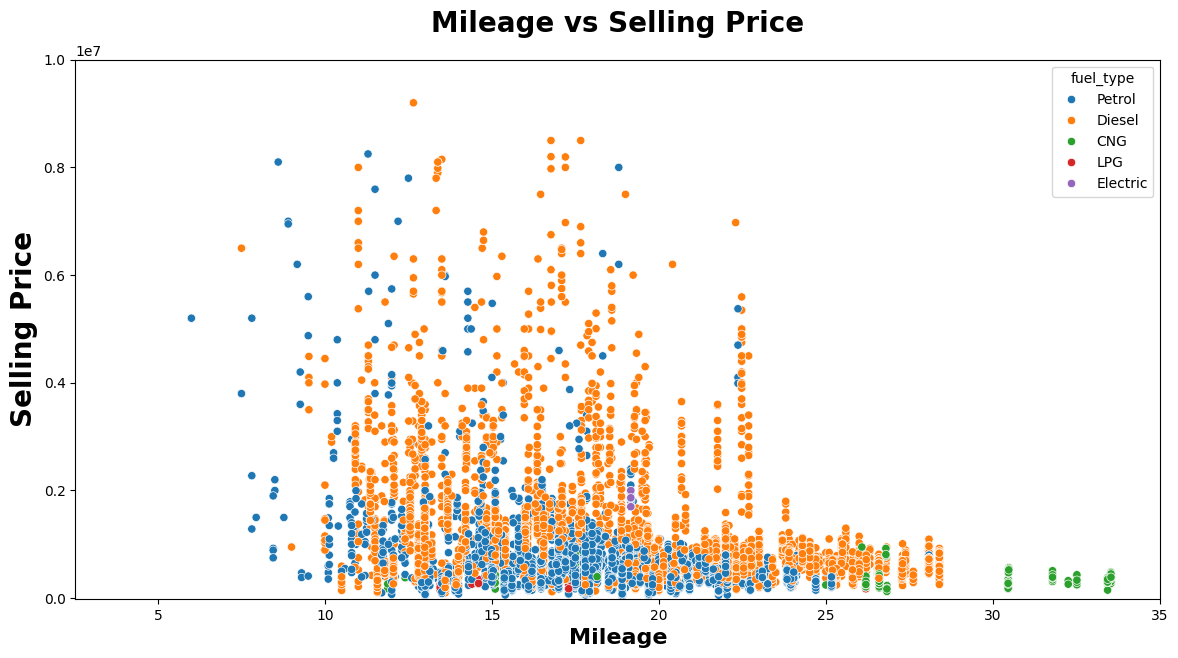

In [ ]:
plt.subplots(figsize=(14,7))
sns.scatterplot(x="mileage", y='selling_price', data=df,ec = "white",color='b', hue='fuel_type')
plt.title("Mileage vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=20)
plt.ylim(-10000,10000000)
plt.xlabel("Mileage", weight="bold", fontsize=16)
plt.show()

# **Basic Interactive Scatter Plot**

In [ ]:
import plotly.express as px

# Create a basic scatter plot with color differentiation by 'fuel_type'
fig = px.scatter(
    df,
    x='mileage',
    y='selling_price',
    color='fuel_type',
    labels={'mileage': 'Mileage', 'selling_price': 'Selling Price'},
    title="Mileage vs Selling Price"
)

# Correctly specify padding using a dictionary
fig.update_layout(
    title=dict(
        text="Mileage vs Selling Price",
        font=dict(size=20),
        pad=dict(t=20, b=10, l=10, r=10)
    )
)
fig.show()


# **Adding a Dropdown Filter**

In [ ]:
# Adding dropdown filter for 'fuel_type'
fig = px.scatter(
    df,
    x='mileage',
    y='selling_price',
    color='fuel_type',
    labels={'mileage': 'Mileage', 'selling_price': 'Selling Price'},
    title="Mileage vs Selling Price"
)

# Add a dropdown menu to filter by fuel_type
fig.update_layout(
    updatemenus=[
        dict(
            buttons=[
                dict(label="All", method="update", args=[{"visible": [True for _ in df['fuel_type'].unique()]}]),
                *[
                    dict(
                        label=fuel_type,
                        method="update",
                        args=[{"visible": [df['fuel_type'].iloc[i] == fuel_type for i in range(len(df))]}]
                    ) for fuel_type in df['fuel_type'].unique()
                ]
            ],
            direction="down"
        )
    ]
)
fig.show()


# **Adding a Range Slider for Mileage**

In [ ]:
# Adding range slider for 'mileage'
fig = px.scatter(
    df,
    x='mileage',
    y='selling_price',
    color='fuel_type',
    labels={'mileage': 'Mileage', 'selling_price': 'Selling Price'},
    title="Mileage vs Selling Price"
)

# Add range slider for the x-axis (mileage)
fig.update_layout(
    xaxis=dict(
        rangeslider=dict(visible=True),
        title="Mileage"
    )
)
fig.show()


### **Enable Interactive Zooming and Panning on Both Axes**

While Plotly doesn't have a direct y-axis slider, we can allow users to zoom and pan manually on both axes by enabling interactive controls.

### Explanation:
- **fig.update_layout(dragmode="pan")**: Enables panning across the plot.
- **range mode for y-axis**: We can specify initial ranges on the y-axis and allow users to zoom as needed.

### Additional Instructions:
To zoom, use the toolbar buttons in the top right of the plot:
- **Zoom**: Click and drag to zoom into a specific area.
- **Pan**: Move the plot without changing zoom level.

---


In [ ]:
fig = px.scatter(df, x='mileage', y='selling_price', color='fuel_type',
                 title="Mileage vs Selling Price",
                 labels={"mileage": "Mileage", "selling_price": "Selling Price"})
fig.update_layout(dragmode='pan',
                  title={'text': "Mileage vs Selling Price", 'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},
                  xaxis_title="Mileage",
                  yaxis_title="Selling Price",
                  xaxis=dict(title_font=dict(size=16, weight='bold')),
                  yaxis=dict(title_font=dict(size=20, weight='bold'), range=[-10000, 10000000]))
fig.show()

#**Detailed Hover Information in Scatter Plot**


The scatter plot features an enhanced hover effect that provides detailed information about each car as users move their cursor over the data points. This interactive element is crucial for delivering a deeper understanding of the dataset at a glance. Here’s what the hover effect includes:

**Vehicle Age:** Shows the number of years since the car was first registered, giving insights into potential depreciation or value retention based on age.

**Engine Details:** Provides specifics about the car’s engine, such as capacity and type, which are important factors affecting performance and efficiency.

**Transmission Type:** Indicates whether the car has a manual or automatic transmission, which can influence buyer preference and price.

These hover details are tailored to enrich the user experience by allowing immediate access to key aspects of each car without needing to navigate away from the plot. This feature makes it exceptionally convenient for users to evaluate cars based on their individual preferences and requirements directly from the visualization.

In [ ]:
import plotly.express as px


# Correcting hover data to match your DataFrame columns
hover_data = {
    'vehicle_age': True,  # Shows the age of the vehicle
    'engine': True,  # Shows engine details
    'transmission_type': True  # Shows transmission type
}

fig = px.scatter(
    df,
    x='mileage',
    y='selling_price',
    color='fuel_type',
    hover_data=hover_data,  # Updated to use actual columns in your DataFrame
    title="Mileage vs Selling Price",
    labels={"mileage": "Mileage", "selling_price": "Selling Price"}
)

# Updating the layout
fig.update_layout(
    dragmode='pan',
    title={'text': "Mileage vs Selling Price", 'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},
    xaxis_title="Mileage",
    yaxis_title="Selling Price",
    xaxis=dict(title_font=dict(size=16, weight='bold')),
    yaxis=dict(title_font=dict(size=20, weight='bold'), range=[-10000, 10000000]),
    hovermode='closest'  # Optimal for detailed hover information
)

fig.show()


## **Mileage Distribution**

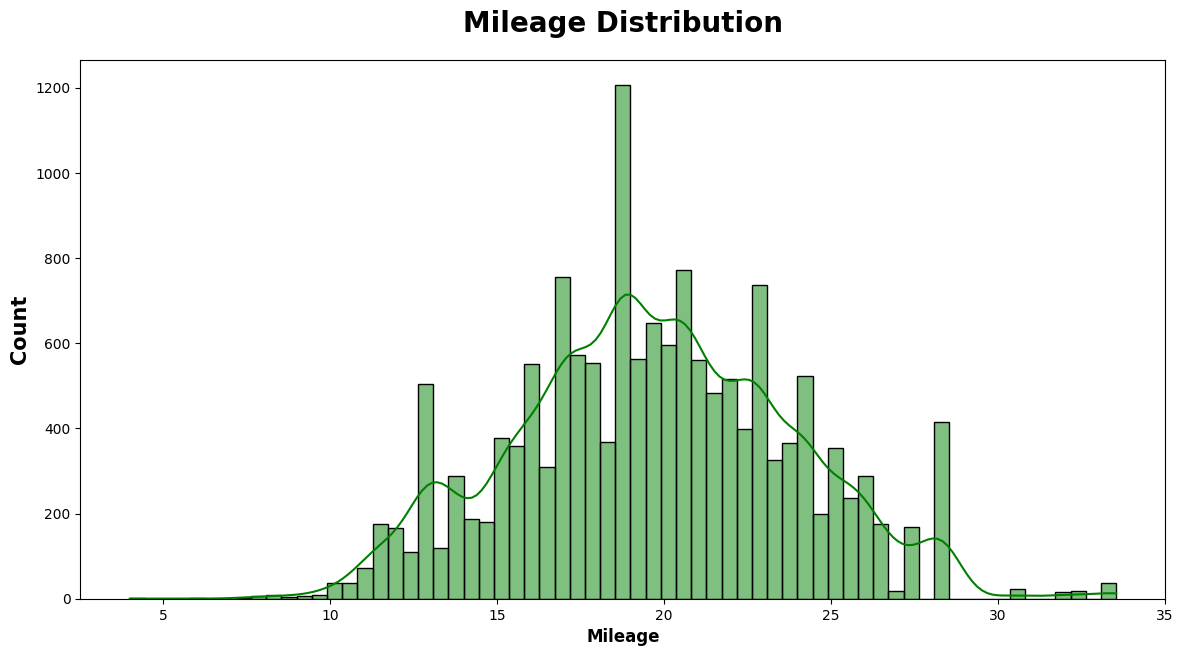

In [ ]:
plt.subplots(figsize=(14,7))
sns.histplot(x=df.mileage, ec = "black", color='g', kde=True)
plt.title("Mileage Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Mileage", weight="bold", fontsize=12)
plt.show()

## **Vehicle Age vs Selling Price**

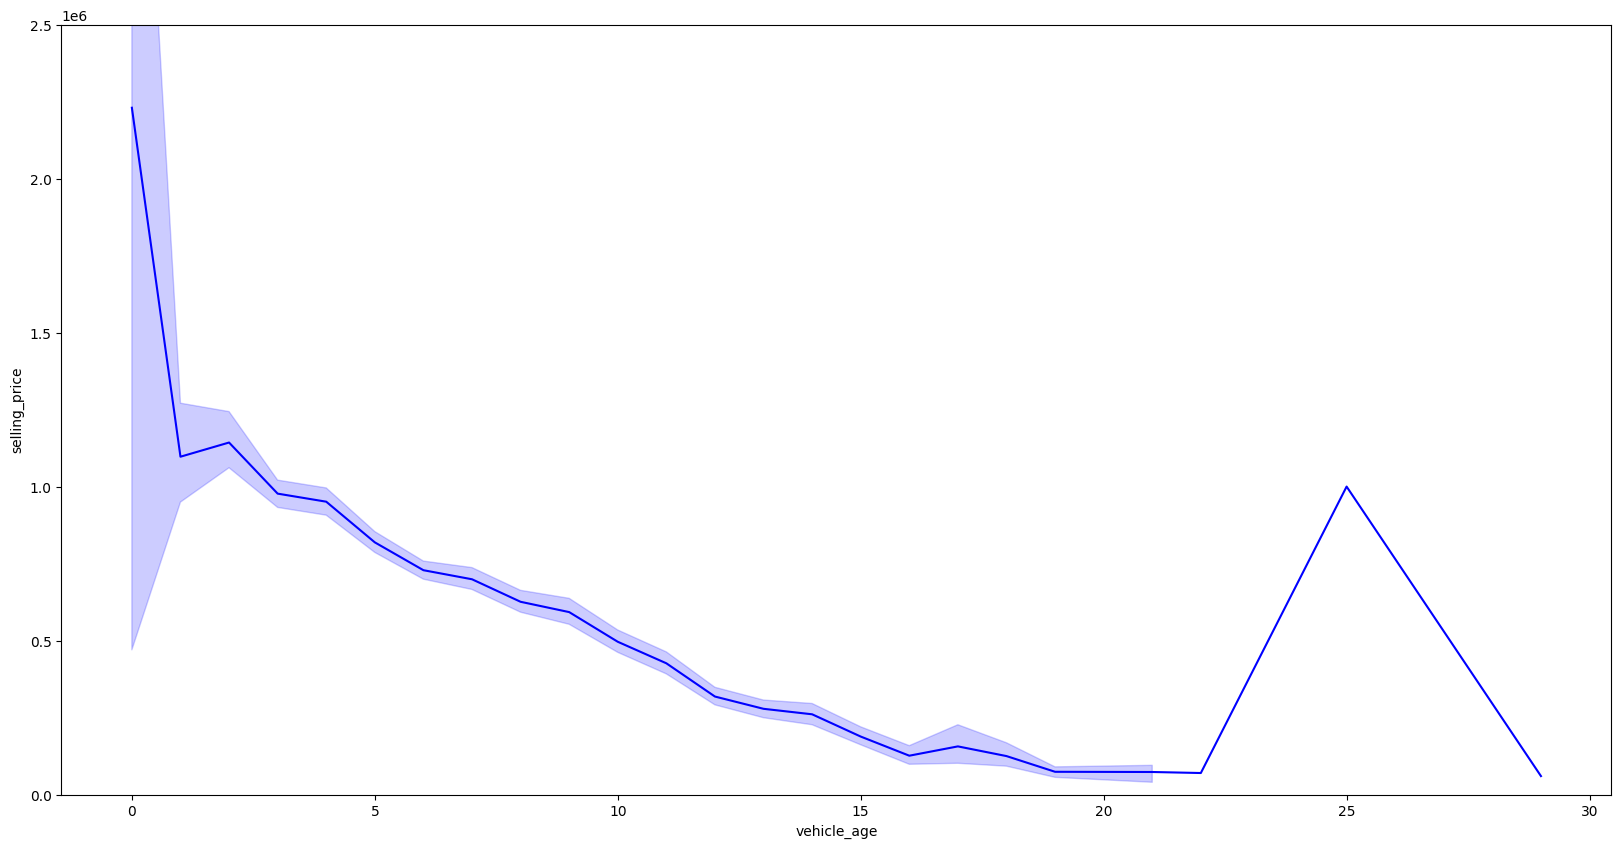

In [ ]:
plt.subplots(figsize=(20,10))
sns.lineplot(x='vehicle_age',y='selling_price',data=df,color='b')
plt.ylim(0,2500000)
plt.show()

#### **Insight**
- As the Vehicle age increases the price also get reduced.
- Vehicle age has Negative impact on selling price


In [ ]:
import plotly.graph_objects as go

# Assuming df has columns 'vehicle_age' and 'selling_price' correctly set
fig = go.Figure()

# Adding the line chart
fig.add_trace(go.Scatter(x=df['vehicle_age'], y=df['selling_price'], mode='lines+markers', name='Selling Price',
                         line=dict(color='blue'), marker=dict(color='blue', size=10)))

# Adding annotations for specific events
# Example: let's say we choose the youngest and oldest vehicle ages for demonstration.
youngest_age = df['vehicle_age'].min()
oldest_age = df['vehicle_age'].max()
youngest_price = df[df['vehicle_age'] == youngest_age]['selling_price'].max()  # highest price for the youngest car
oldest_price = df[df['vehicle_age'] == oldest_age]['selling_price'].min()  # lowest price for the oldest car

annotations = [
    dict(x=youngest_age, y=youngest_price, xref='x', yref='y',
         text="Highest Initial Value", showarrow=True, font=dict(color="white"),
         align="center", arrowhead=2, arrowsize=1, arrowwidth=2, arrowcolor="green",
         ax=20, ay=-30, bgcolor="green", borderwidth=1, borderpad=4),
    dict(x=oldest_age, y=oldest_price, xref='x', yref='y',
         text="Significant Depreciation", showarrow=True, font=dict(color="white"),
         align="center", arrowhead=2, arrowsize=1, arrowwidth=2, arrowcolor="red",
         ax=-20, ay=-30, bgcolor="red", borderwidth=1, borderpad=4)
]

fig.update_layout(
    title="Vehicle Age vs Selling Price",
    xaxis_title="Vehicle Age (Years)",
    yaxis_title="Selling Price (INR)",
    annotations=annotations,
    xaxis=dict(tickmode='array', tickvals=df['vehicle_age'], ticktext=[f'{age} yrs' for age in df['vehicle_age']])
)

fig.show()


## **Vehicle Age vs Mileage**

In [ ]:
vehicle_age = df.groupby('vehicle_age')['mileage'].median().sort_values(ascending=False)
vehicle_age.to_frame().head(5)

mileage
vehicle_age         
29             22.05
0              21.70
3              21.21
4              20.63
5              20.51

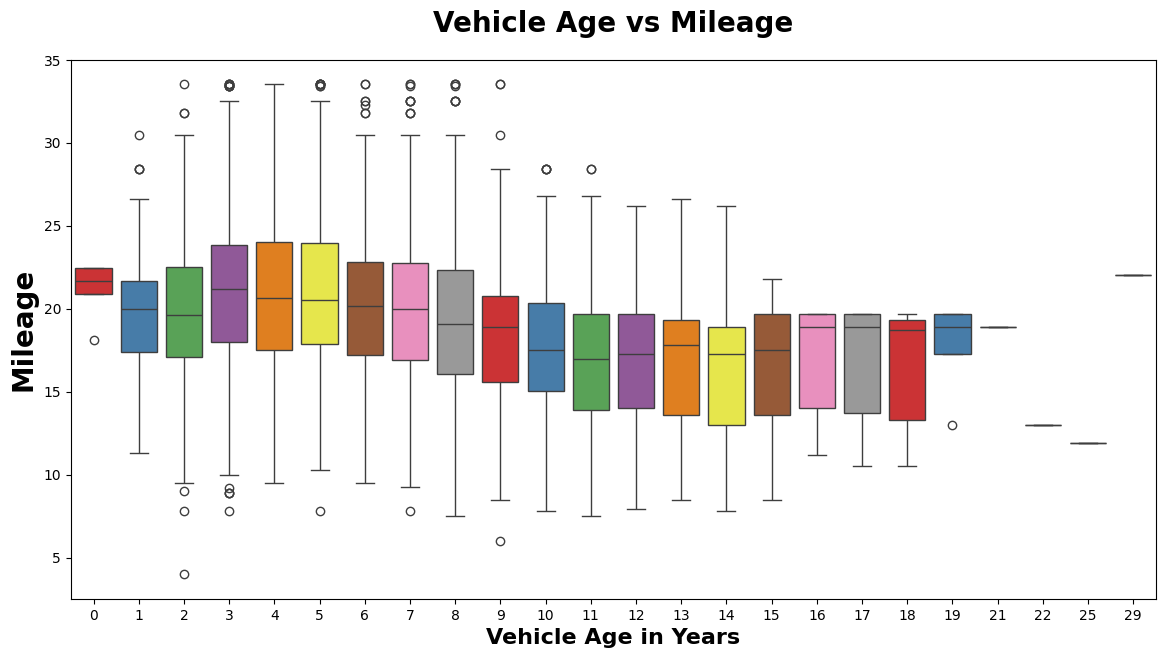

In [ ]:
plt.subplots(figsize=(14,7))
sns.boxplot(x=df.vehicle_age, y= df.mileage, palette="Set1")
plt.title("Vehicle Age vs Mileage", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mileage", weight="bold", fontsize=20)
plt.xlabel("Vehicle Age in Years", weight="bold", fontsize=16)
plt.show()

#### **Insights**
- As the Age of vehicle increases the median of mileage drops.
- Newer Vehicles have more mileage median older vehicle.

In [ ]:
oldest = df.groupby('car_name')['vehicle_age'].max().sort_values(ascending=False).head(10)
oldest.to_frame()

vehicle_age
car_name                          
Maruti Alto                     29
BMW 3                           25
Honda City                      22
Maruti Wagon R                  21
Mahindra Bolero                 18
Mahindra Scorpio                18
Skoda Octavia                   18
Honda CR-V                      17
Mercedes-Benz E-Class           17
Honda Civic                     15

#### **Insight**
- Maruti Alto is the Oldest car available 29 years old in the used car website followed by BMW 3 for 25 years old.

## **Transmission Type Vs Count**

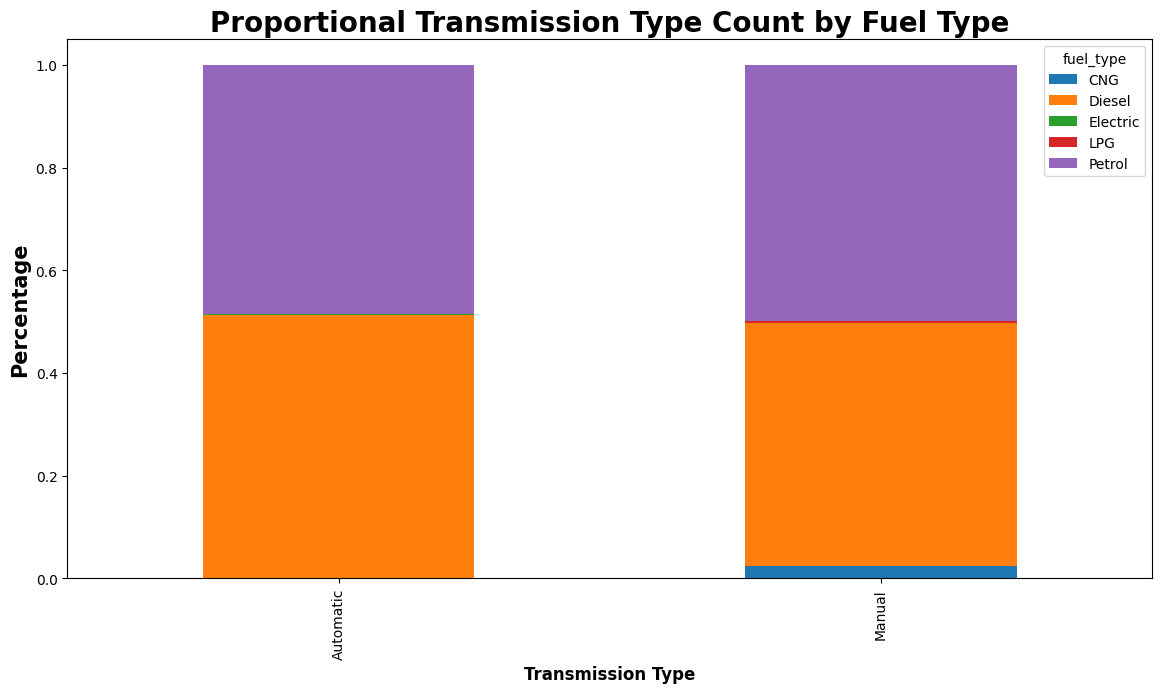

In [ ]:
df_grouped = df.groupby(['transmission_type', 'fuel_type']).size().unstack().fillna(0)
df_percent = df_grouped.div(df_grouped.sum(axis=1), axis=0)
df_percent.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title("Proportional Transmission Type Count by Fuel Type", weight="bold", fontsize=20)
plt.xlabel("Transmission Type", weight="bold", fontsize=12)
plt.ylabel("Percentage", weight="bold", fontsize=15)
plt.show()


## **Transmission Type Vs Selling Price**

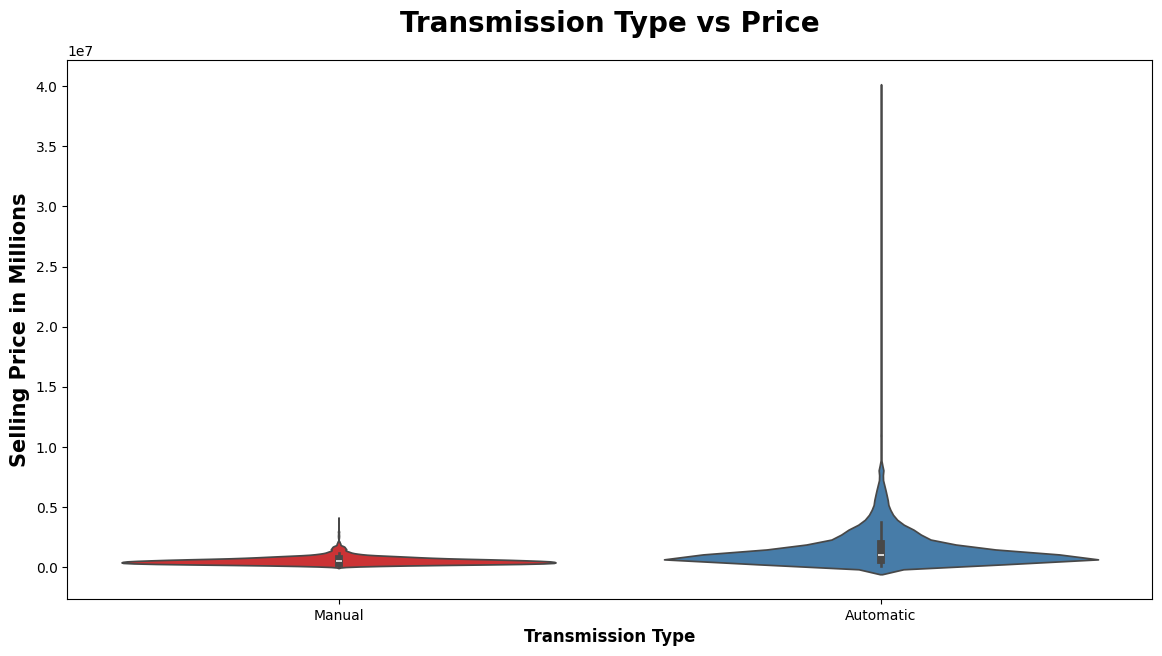

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the figure and axis
plt.subplots(figsize=(14,7))

# Create a violin plot
sns.violinplot(x='transmission_type', y='selling_price', data=df, palette="Set1")

# Customize the plot
plt.title("Transmission Type vs Price", weight="bold", fontsize=20, pad=20)
plt.ylabel("Selling Price in Millions", weight="bold", fontsize=15)
plt.xlabel("Transmission Type", weight="bold", fontsize=12)

plt.show()


#### **Insight**
- Manual Transmission was found in most of the cars which was sold.
- Automatic cars have more selling price than manual cars.

## **Seller Type  Vs Count**

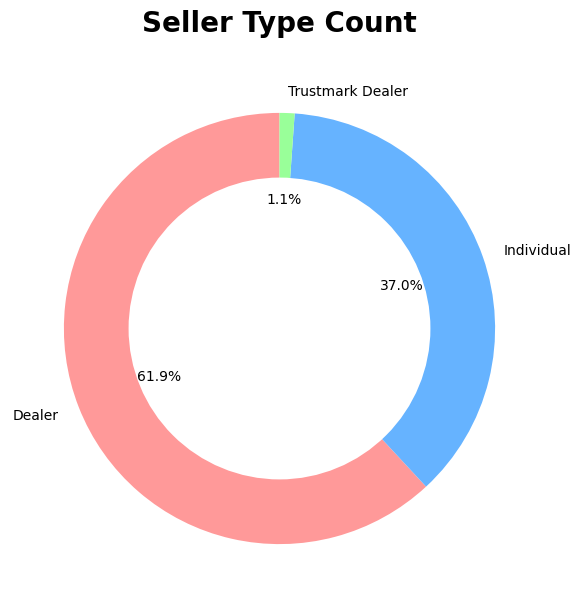

In [ ]:
# Calculate counts
seller_type_counts = df['seller_type'].value_counts()

# Create the pie chart as a donut chart
fig, ax = plt.subplots(figsize=(14, 7))
ax.pie(seller_type_counts, labels=seller_type_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
ax.add_artist(plt.Circle((0, 0), 0.70, fc='white'))

# Set title and format it
plt.title("Seller Type Count", weight="bold", fontsize=20, pad=20)

plt.show()

## **Seller Type vs Selling Price**

In [ ]:
dealer = df.groupby('seller_type')['selling_price'].median().sort_values(ascending=False)
dealer.to_frame()

selling_price
seller_type                    
Dealer                 591000.0
Trustmark Dealer       540000.0
Individual             507000.0

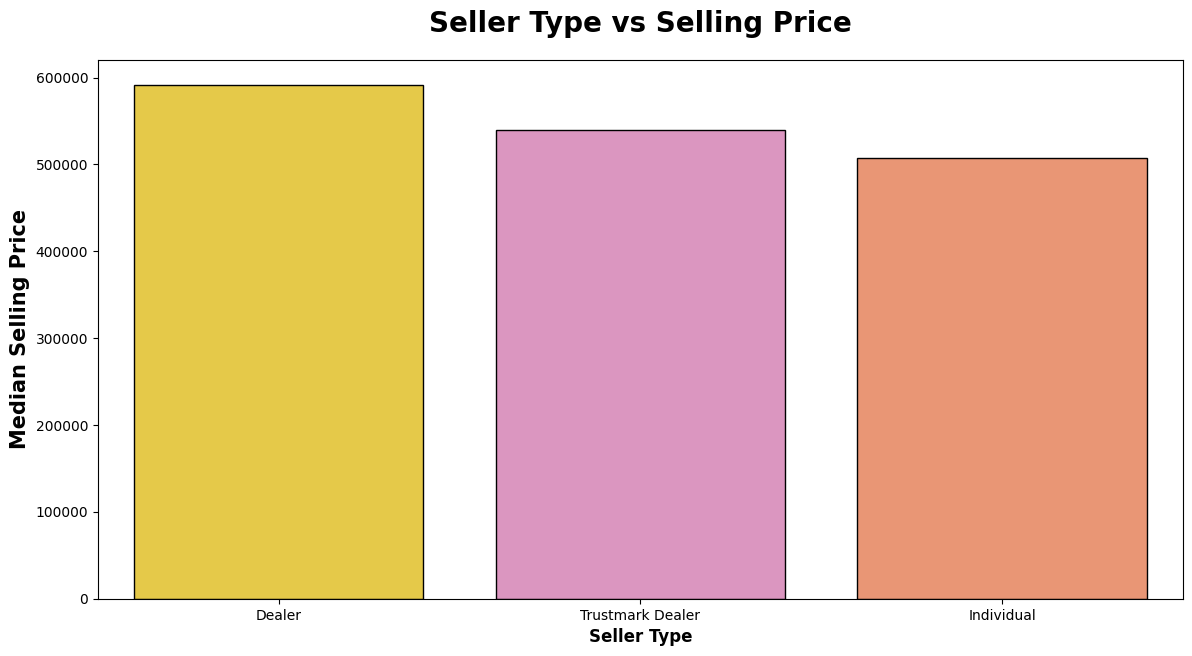

In [ ]:
plt.subplots(figsize=(14,7))
sns.barplot(x=dealer.index, y=dealer.values, ec = "black", palette="Set2_r")
plt.title("Seller Type vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Median Selling Price", weight="bold", fontsize=15)
plt.xlabel("Seller Type", weight="bold", fontsize=12)
plt.show()

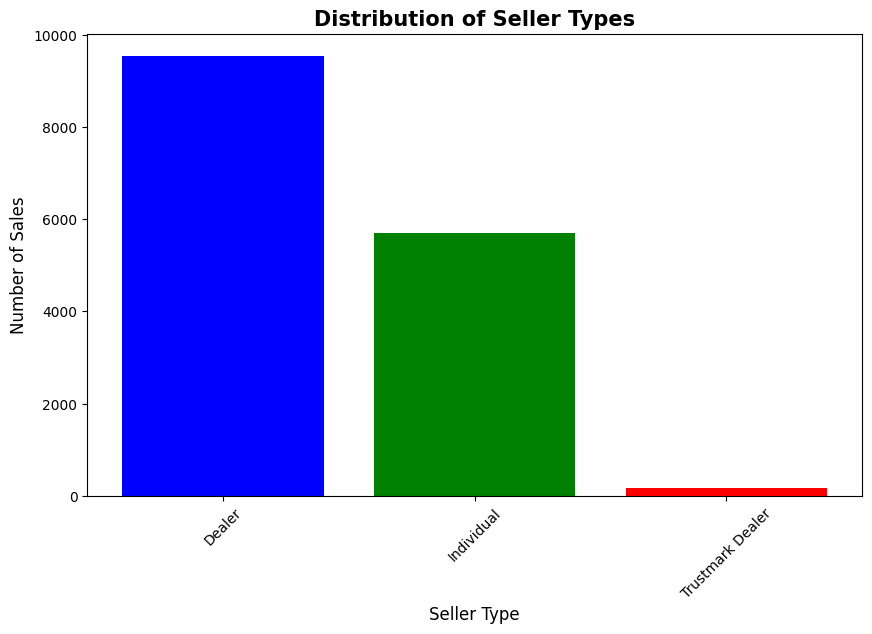

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a DataFrame 'df' with a 'seller_type' column
# First, calculate the counts for each seller type
seller_counts = df['seller_type'].value_counts()

# Now, plot these counts as a bar chart
plt.figure(figsize=(10, 6))  # Set the figure size for better visibility
plt.bar(seller_counts.index, seller_counts.values, color=['blue', 'green', 'red'])  # Use different colors for each bar

# Adding titles and labels for clarity
plt.title('Distribution of Seller Types', fontsize=15, fontweight='bold')
plt.xlabel('Seller Type', fontsize=12)
plt.ylabel('Number of Sales', fontsize=12)
plt.xticks(rotation=45)  # Rotate category labels for better readability

# Show the plot
plt.show()


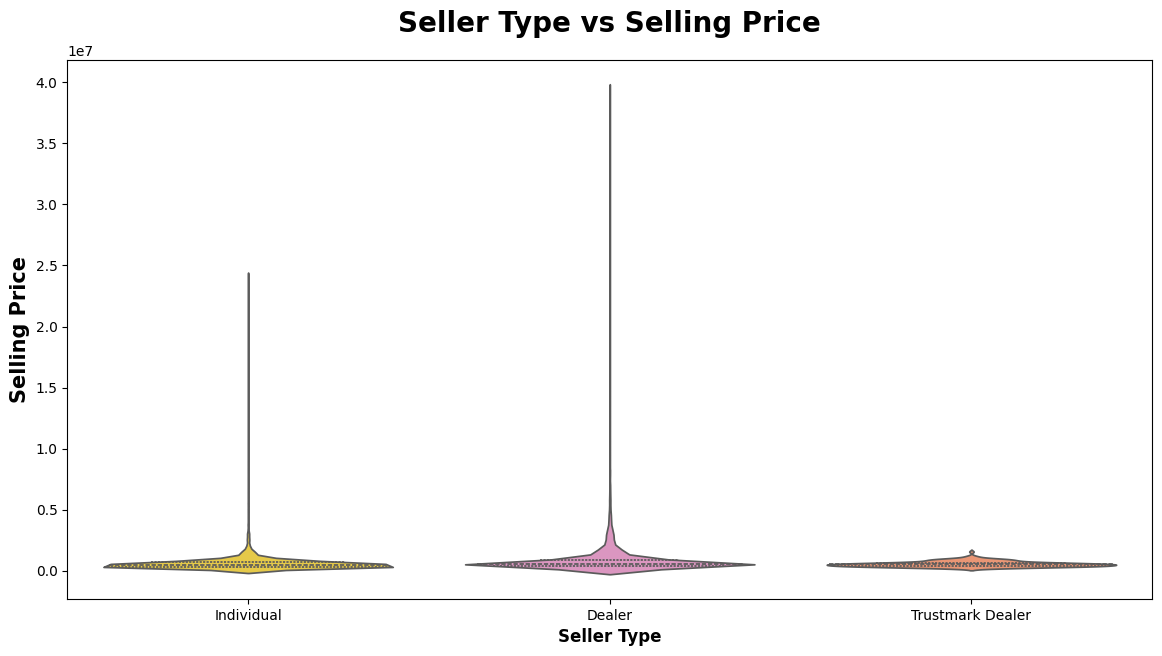

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' contains your full dataset with 'seller_type' and 'selling_price' columns
plt.figure(figsize=(14,7))
sns.violinplot(x='seller_type', y='selling_price', data=df, palette="Set2_r", inner="quartile")

plt.title("Seller Type vs Selling Price", weight="bold", fontsize=20, pad=20)
plt.xlabel("Seller Type", weight="bold", fontsize=12)
plt.ylabel("Selling Price", weight="bold", fontsize=15)
plt.show()


#### **Insights**
- Dealers have put more ads on used car website.
- Dealers have put 9539 ads with median selling price of 5.91 Lakhs.
- Followed by Individual with 5699 ads with median selling price of 5.4 Lakhs.
- Dealers have more median selling price than Individual.

## **Final Report**

- The datatypes and Column names were right and there was 15411 rows and 13 columns
- The `selling_price` column is the target to predict. i.e Regression Problem.
- There are outliers in the `km_driven`, `enginer`, `selling_price`, and `max power`.
- Dealers are the highest sellers of the used cars.
- Skewness is found in few of the columns will check it after handling outliers.
- Vehicle age has negative impact on the price.
- Manual cars are mostly sold and automatic has higher selling average than manual cars.
- Petrol is the most preffered choice of fuel in used car website, followed by diesel and LPG.
- We just need less data cleaning for this dataset.

# **9) Feature Engineering**

In [ ]:
df.head()

car_name    brand     model  vehicle_age  km_driven seller_type  \
0    Maruti Alto   Maruti      Alto            9     120000  Individual   
1  Hyundai Grand  Hyundai     Grand            5      20000  Individual   
2    Hyundai i20  Hyundai       i20           11      60000  Individual   
3    Maruti Alto   Maruti      Alto            9      37000  Individual   
4  Ford Ecosport     Ford  Ecosport            6      30000      Dealer   

  fuel_type transmission_type  mileage  engine  max_power  seats  \
0    Petrol            Manual    19.70     796      46.30      5   
1    Petrol            Manual    18.90    1197      82.00      5   
2    Petrol            Manual    17.00    1197      80.00      5   
3    Petrol            Manual    20.92     998      67.10      5   
4    Diesel            Manual    22.77    1498      98.59      5   

   selling_price  
0         120000  
1         550000  
2         215000  
3         226000  
4         570000

## **Removing unnecessary features**

**Dropping `car_name` ,`brand` and `model`**

These features  are not directly correlated with the price of car and they can actually introduce noise into the model. For example, two cars with the same features but different brands may have different prices. This is because brand reputation and perceived quality can play a role in determining the price of a car. By dropping the `car_name` ,`brand` and `model`, we can create a model that is more accurate and reliable.

In [ ]:
# Creating copy of  original dataframe

df_model=df.copy()

df_model

car_name     brand     model  vehicle_age  km_driven  \
0          Maruti Alto    Maruti      Alto            9     120000   
1        Hyundai Grand   Hyundai     Grand            5      20000   
2          Hyundai i20   Hyundai       i20           11      60000   
3          Maruti Alto    Maruti      Alto            9      37000   
4        Ford Ecosport      Ford  Ecosport            6      30000   
...                ...       ...       ...          ...        ...   
19537      Hyundai i10   Hyundai       i10            9      10723   
19540    Maruti Ertiga    Maruti    Ertiga            2      18000   
19541      Skoda Rapid     Skoda     Rapid            6      67000   
19542  Mahindra XUV500  Mahindra    XUV500            5    3800000   
19543       Honda City     Honda      City            2      13000   

      seller_type fuel_type transmission_type  mileage  engine  max_power  \
0      Individual    Petrol            Manual    19.70     796      46.30   
1      Individual    Petrol            Manual    18.90    1197      82.00   
2      Individual    Petrol            Manual    17.00    1197      80.00   
3      Individual    Petrol            Manual    20.92     998      67.10   
4          Dealer    Diesel            Manual    22.77    1498      98.59   
...           ...       ...               ...      ...     ...        ...   
19537      Dealer    Petrol            Manual    19.81    1086      68.05   
19540      Dealer    Petrol            Manual    17.50    1373      91.10   
19541      Dealer    Diesel            Manual    21.14    1498     103.52   
19542      Dealer    Diesel            Manual    16.00    2179     140.00   
19543      Dealer    Petrol         Automatic    18.00    1497     117.60   

       seats  selling_price  
0          5         120000  
1          5         550000  
2          5         215000  
3          5         226000  
4          5         570000  
...      ...            ...  
19537      5         250000  
19540      7         925000  
19541      5         425000  
19542      7        1225000  
19543      5        1200000  

[15411 rows x 13 columns]

In [ ]:
df_model.drop(labels=['car_name','brand','model'],axis=1,inplace=True)

df_model

vehicle_age  km_driven seller_type fuel_type transmission_type  \
0                9     120000  Individual    Petrol            Manual   
1                5      20000  Individual    Petrol            Manual   
2               11      60000  Individual    Petrol            Manual   
3                9      37000  Individual    Petrol            Manual   
4                6      30000      Dealer    Diesel            Manual   
...            ...        ...         ...       ...               ...   
19537            9      10723      Dealer    Petrol            Manual   
19540            2      18000      Dealer    Petrol            Manual   
19541            6      67000      Dealer    Diesel            Manual   
19542            5    3800000      Dealer    Diesel            Manual   
19543            2      13000      Dealer    Petrol         Automatic   

       mileage  engine  max_power  seats  selling_price  
0        19.70     796      46.30      5         120000  
1        18.90    1197      82.00      5         550000  
2        17.00    1197      80.00      5         215000  
3        20.92     998      67.10      5         226000  
4        22.77    1498      98.59      5         570000  
...        ...     ...        ...    ...            ...  
19537    19.81    1086      68.05      5         250000  
19540    17.50    1373      91.10      7         925000  
19541    21.14    1498     103.52      5         425000  
19542    16.00    2179     140.00      7        1225000  
19543    18.00    1497     117.60      5        1200000  

[15411 rows x 10 columns]

## **Converting Categorical Columns into numerical**

Using **`One Hot Encoding (get_dummies)`** to convert categorical variables to numerical

In [ ]:
df_model=pd.get_dummies(df_model,dtype=float)
df_model

vehicle_age  km_driven  mileage  engine  max_power  seats  \
0                9     120000    19.70     796      46.30      5   
1                5      20000    18.90    1197      82.00      5   
2               11      60000    17.00    1197      80.00      5   
3                9      37000    20.92     998      67.10      5   
4                6      30000    22.77    1498      98.59      5   
...            ...        ...      ...     ...        ...    ...   
19537            9      10723    19.81    1086      68.05      5   
19540            2      18000    17.50    1373      91.10      7   
19541            6      67000    21.14    1498     103.52      5   
19542            5    3800000    16.00    2179     140.00      7   
19543            2      13000    18.00    1497     117.60      5   

       selling_price  seller_type_Dealer  seller_type_Individual  \
0             120000                 0.0                     1.0   
1             550000                 0.0                     1.0   
2             215000                 0.0                     1.0   
3             226000                 0.0                     1.0   
4             570000                 1.0                     0.0   
...              ...                 ...                     ...   
19537         250000                 1.0                     0.0   
19540         925000                 1.0                     0.0   
19541         425000                 1.0                     0.0   
19542        1225000                 1.0                     0.0   
19543        1200000                 1.0                     0.0   

       seller_type_Trustmark Dealer  fuel_type_CNG  fuel_type_Diesel  \
0                               0.0            0.0               0.0   
1                               0.0            0.0               0.0   
2                               0.0            0.0               0.0   
3                               0.0            0.0               0.0   
4                               0.0            0.0               1.0   
...                             ...            ...               ...   
19537                           0.0            0.0               0.0   
19540                           0.0            0.0               0.0   
19541                           0.0            0.0               1.0   
19542                           0.0            0.0               1.0   
19543                           0.0            0.0               0.0   

       fuel_type_Electric  fuel_type_LPG  fuel_type_Petrol  \
0                     0.0            0.0               1.0   
1                     0.0            0.0               1.0   
2                     0.0            0.0               1.0   
3                     0.0            0.0               1.0   
4                     0.0            0.0               0.0   
...                   ...            ...               ...   
19537                 0.0            0.0               1.0   
19540                 0.0            0.0               1.0   
19541                 0.0            0.0               0.0   
19542                 0.0            0.0               0.0   
19543                 0.0            0.0               1.0   

       transmission_type_Automatic  transmission_type_Manual  
0                              0.0                       1.0  
1                              0.0                       1.0  
2                              0.0                       1.0  
3                              0.0                       1.0  
4                              0.0                       1.0  
...                            ...                       ...  
19537                          0.0                       1.0  
19540                          0.0                       1.0  
19541                          0.0                       1.0  
19542                          0.0                       1.0  
19543                          1.0                       0.0  

[15411

In [ ]:
df_model.dtypes

vehicle_age                       int64
km_driven                         int64
mileage                         float64
engine                            int64
max_power                       float64
seats                             int64
selling_price                     int64
seller_type_Dealer              float64
seller_type_Individual          float64
seller_type_Trustmark Dealer    float64
fuel_type_CNG                   float64
fuel_type_Diesel                float64
fuel_type_Electric              float64
fuel_type_LPG                   float64
fuel_type_Petrol                float64
transmission_type_Automatic     float64
transmission_type_Manual        float64
dtype: object

## **Creating Feature Matrix (Independent Variables) & Target Variable (Dependent Variable)**

In [ ]:
X=df_model.drop('selling_price',axis=1)      # Feature Matrix
X

vehicle_age  km_driven  mileage  engine  max_power  seats  \
0                9     120000    19.70     796      46.30      5   
1                5      20000    18.90    1197      82.00      5   
2               11      60000    17.00    1197      80.00      5   
3                9      37000    20.92     998      67.10      5   
4                6      30000    22.77    1498      98.59      5   
...            ...        ...      ...     ...        ...    ...   
19537            9      10723    19.81    1086      68.05      5   
19540            2      18000    17.50    1373      91.10      7   
19541            6      67000    21.14    1498     103.52      5   
19542            5    3800000    16.00    2179     140.00      7   
19543            2      13000    18.00    1497     117.60      5   

       seller_type_Dealer  seller_type_Individual  \
0                     0.0                     1.0   
1                     0.0                     1.0   
2                     0.0                     1.0   
3                     0.0                     1.0   
4                     1.0                     0.0   
...                   ...                     ...   
19537                 1.0                     0.0   
19540                 1.0                     0.0   
19541                 1.0                     0.0   
19542                 1.0                     0.0   
19543                 1.0                     0.0   

       seller_type_Trustmark Dealer  fuel_type_CNG  fuel_type_Diesel  \
0                               0.0            0.0               0.0   
1                               0.0            0.0               0.0   
2                               0.0            0.0               0.0   
3                               0.0            0.0               0.0   
4                               0.0            0.0               1.0   
...                             ...            ...               ...   
19537                           0.0            0.0               0.0   
19540                           0.0            0.0               0.0   
19541                           0.0            0.0               1.0   
19542                           0.0            0.0               1.0   
19543                           0.0            0.0               0.0   

       fuel_type_Electric  fuel_type_LPG  fuel_type_Petrol  \
0                     0.0            0.0               1.0   
1                     0.0            0.0               1.0   
2                     0.0            0.0               1.0   
3                     0.0            0.0               1.0   
4                     0.0            0.0               0.0   
...                   ...            ...               ...   
19537                 0.0            0.0               1.0   
19540                 0.0            0.0               1.0   
19541                 0.0            0.0               0.0   
19542                 0.0            0.0               0.0   
19543                 0.0            0.0               1.0   

       transmission_type_Automatic  transmission_type_Manual  
0                              0.0                       1.0  
1                              0.0                       1.0  
2                              0.0                       1.0  
3                              0.0                       1.0  
4                              0.0                       1.0  
...                            ...                       ...  
19537                          0.0                       1.0  
19540                          0.0                       1.0  
19541                          0.0                       1.0  
19542                          0.0                       1.0  
19543                          1.0                       0.0  

[15411 rows x 16 columns]

In [ ]:
y=df_model['selling_price']    # Target Variable
y

0         120000
1         550000
2         215000
3         226000
4         570000
          ...   
19537     250000
19540     925000
19541     425000
19542    1225000
19543    1200000
Name: selling_price, Length: 15411, dtype: int64

## **Checking for important features**

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()

print(model.fit(X,y))

ExtraTreesRegressor()


In [ ]:
print('-'*50)
print('Checking for feature importance')
print('-'*50)

print(model.feature_importances_)

--------------------------------------------------
Checking for feature importance
--------------------------------------------------
[1.74270920e-01 5.11171167e-02 5.91676917e-02 1.44929329e-01
 3.70283904e-01 1.46079247e-02 3.75896435e-03 4.14439123e-03
 2.24230495e-05 4.34834048e-05 7.67055853e-03 7.41393213e-05
 3.35215226e-06 1.99784947e-02 7.41982410e-02 7.57290661e-02]


### **Visulization for feature importance**

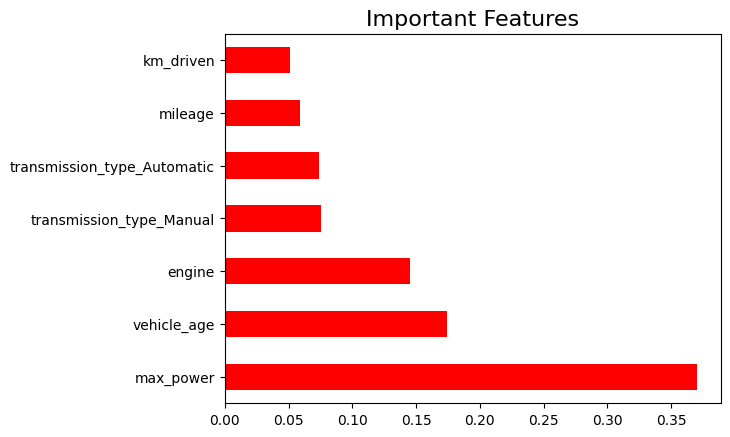

In [ ]:
imp_feature = pd.Series(model.feature_importances_, index = X.columns)
imp_feature.nlargest(7).plot(kind = 'barh', color='red')
plt.title('Important Features', fontsize=16)
plt.show()

However, we will use all features for prediction

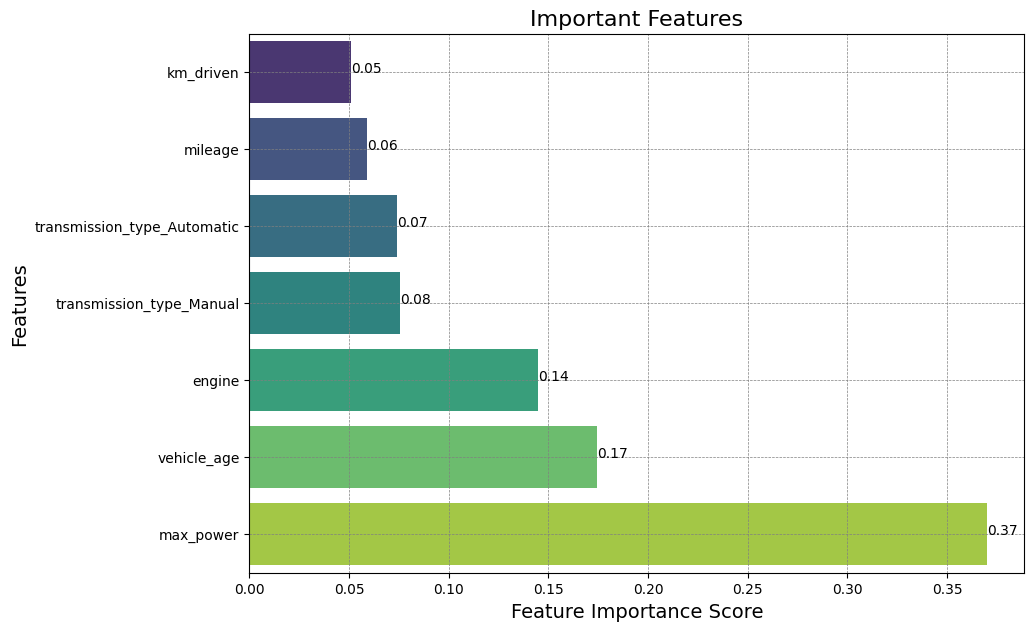

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns  # For a better color palette

# Assuming 'model' and 'X' are already defined and feature_importances_ are available
imp_feature = pd.Series(model.feature_importances_, index=X.columns)

plt.figure(figsize=(10, 7))  # Increase the figure size for better readability
top_features = imp_feature.nlargest(7).sort_values()  # Sort values for better visual hierarchy
sns.barplot(x=top_features, y=top_features.index, palette='viridis')  # Use a colorblind-friendly palette

# Add annotations
for index, value in enumerate(top_features):
    plt.text(value, index, f'{value:.2f}')  # Display importance values with 2 decimal places

plt.title('Important Features', fontsize=16)
plt.xlabel('Feature Importance Score', fontsize=14)  # Clarify what the x-axis represents
plt.ylabel('Features', fontsize=14)  # Enhance label visibility
plt.grid(True, which='major', linestyle='--', linewidth='0.5', color='grey')  # Add a grid for easier value reading
plt.show()
